In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from pandas.api.types import CategoricalDtype
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import datetime as dt
from plotnine import *
from scipy.stats import chi2_contingency
from scipy.stats import iqr
from scipy.stats import ttest_rel
from scipy.stats import normaltest
from scipy.stats import levene
from scipy.cluster.hierarchy import linkage, fcluster
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from functions import *
import matplotlib.ticker as mtick
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
import pickle
from sklearn import neighbors, metrics
from P7_code_aide import *
import unicodedata
import string_grouper as sg
import plotly.graph_objs as go
import plotly
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import xgboost as xgb

# on utilisera un pipeline pour enchaîner les traitements
from sklearn.pipeline import Pipeline

# les méthodes de prétraitement
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# les outils de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [2]:
#Fonction de vérification clés primaires

def cle_primaire(dataframe, colonnes) :
    valle = dataframe[dataframe.duplicated(colonnes)]
    print(f"Est-ce que les colonnes ({colonnes}) sont un ensemble clé primaire ?")
    if valle.empty :
        print("Oui !")
    else :
        print("Non !")
        print(valle)

#Fonction pour centrer reduire les valeurs d'un dataframe 

def centre_reduit(dataframe):
    data_centre_reduit = dataframe
    for i in data_centre_reduit.columns:
        data_centre_reduit[i] = (data_centre_reduit[i] - np.mean(data_centre_reduit[i]))/np.std(data_centre_reduit[i])
    return data_centre_reduit

#Fonction pour rajouter des colonnes booleennes pour identifier les outliers
#La variable "colonnes" doit être sous forme de liste
def Affichage_outliers(table_analyse, colonnes) :
    datab = table_analyse.dropna(subset = colonnes).copy()
    for i in datab.loc[:,colonnes].columns :

        Q1 = np.quantile(datab[i], 0.25)
        Q3 = np.quantile(datab[i], 0.75)
        IQR = iqr(datab[i])

        mask = (datab[i] < (Q1 - 1.5 * IQR))|(datab[i] > (Q3 + 1.5 * IQR))
        titre = "outliers_" + i
        datab[titre] = False
        datab.loc[mask,titre] = True
    return datab

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

        
def round_spe(l, target):
    cumul = np.array(np.ceil(np.cumsum(l))).astype('int')
    cumul = np.insert(cumul, 0, 0)
    i=1
    new=np.zeros(len(l))
    while i != cumul.shape[0]:
        new[i-1] = cumul[i] - cumul[i-1]
        i += 1
    return new

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [3]:
child_obesity_new = pd.read_csv("Obesity_child.csv")
adult_obesity = pd.read_csv("obesity-cleaned.csv")
pop_urbaine = pd.read_csv("Pop_urbaine.csv", header =2)
pop = pd.read_csv("population.csv", encoding = "latin_1")
undernourrish = pd.read_csv("sous_nutrition.csv")
lack_sport_adult = pd.read_csv("lack_sport_adult.csv", header =[0,1])
lack_sport_child = pd.read_csv("lack_sport_child.csv", header =[0,1])
dispo_alim = pd.read_csv("dispo_alim.csv")
PIB = pd.read_csv("PIB-VA.csv")
trad = pd.read_csv("Trad_country.csv", encoding='utf-16')
Africa = pd.read_csv("Africa.csv")
Americas = pd.read_csv("Americas.csv")
Asia = pd.read_csv("Asia.csv")
Europe = pd.read_csv("Europe.csv")
Oceania = pd.read_csv("Oceania.csv")
Supply = pd.read_csv("Supply.csv")
Mental = pd.read_csv("mental substance.csv")
Alcohol = pd.read_csv("Alcohol.csv")
poverty = pd.read_csv("Poverty.csv", header = 2)

## Nettoyage des tables :

### Table Mcdo : 

In [4]:
Mcdo = pd.read_excel("Mcdo.xlsx")

In [5]:
Mcdo = Mcdo.drop("#", axis = 1)

In [6]:
Mcdo

Name of country  \
0                                        United States   
1                                     Canada (details)   
2                 Puerto Rico (part of  United States)   
3         U.S. Virgin Islands (part of  United States)   
4                                           Costa Rica   
5                                            Australia   
6                        Guam (part of  United States)   
7                                                Japan   
8                                          Netherlands   
9                                               Panama   
10                                             Germany   
11                                    France (details)   
12                                         El Salvador   
13                                              Sweden   
14                                           Guatemala   
15                      Curaçao (part of  Netherlands)   
16                                      United Kingdom   
17         Hong Kong ( British Hong Kong at the time)    
18                                             Bahamas   
19                               New Zealand (details)   
20                                         Switzerland   
21                                             Ireland   
22                                             Austria   
23                                             Belgium   
24                                              Brazil   
25                                           Singapore   
26                                               Spain   
27                                             Denmark   
28                               Philippines (details)   
29                                            Malaysia   
30                                              Norway   
31                                             Taiwan    
32                                             Andorra   
33                                             Finland   
34                                            Thailand   
35                                               Italy   
36                        Aruba (part of  Netherlands)   
37                                          Luxembourg   
38                                           Venezuela   
39                                              Mexico   
40                                                Cuba   
41                                              Turkey   
42                                           Argentina   
43              Macau (  Portuguese Macau at the time)   
44            Serbia (part of  Yugoslavia at the time)   
45                                         South Korea   
46                          Hungary ( HPR at the time)   
47          Russia (part of  Soviet Union at the time)   
48                                              China    
49                                               Chile   
50                                           Indonesia   
51                                            Portugal   
52                                              Greece   
53                                             Uruguay   
54                                          Martinique   
55    Czech Republic (part of  Czechoslovakia at th...   
56                                          Guadeloupe   
57                                              Poland   
58                                              Monaco   
59                                              Brunei   
60                                             Morocco   
61          Northern Marianas (part of  United States)   
62                                    Israel (details)   
63                                            Slovenia   
64                                        Saudi Arabia   
65                                              Kuwait   
66                     New Caledonia (part of  France)   
67                                                Oman   
68                                   

In [7]:
for f in [0,3] :
    tempa = []
    temp = Mcdo.iloc[:,f].astype(str).to_numpy()
    for i in temp :
        if i.find("[") != -1 :
            if i.find("[") == 0:
                p = i[(i.rfind("]")+1):]
                tempa.append(p.strip())
            else :
                p = i[:i.find("[")]
                tempa.append(p.strip())
        elif i.find("(") != -1 :
            if i.find("[") == 0:
                p = i[(i.rfind(")")+1):]
                tempa.append(p.strip())
            else :
                p = i[:i.find("(")]
                tempa.append(p.strip())    
        else:
            tempa.append(i)
    Mcdo.iloc[:,f] = tempa


In [8]:
Mcdo.iloc[:,-1] = Mcdo.iloc[:,-1].apply(lambda x: str(x).replace(".", ","))

In [9]:
tempa = []
temp = Mcdo.iloc[:,-1].astype(str).to_numpy()
for i in temp :
    if i.rfind(",") != -1 :
        if len(i[(i.rfind(",")+1):]) == 1:
            tempa.append((i[:(i.rfind(",")+1)]+i[(i.rfind(",")+1):]+"00").replace(",", ""))
        elif len(i[(i.rfind(",")+1):]) == 2:
            tempa.append((i[:(i.rfind(",")+1)]+i[(i.rfind(",")+1):]+"0").replace(",", ""))
        else :
            tempa.append(i.replace(",", ""))
    else:
        tempa.append(i)
Mcdo.iloc[:,-1] = tempa
Mcdo.iloc[:,-1] = Mcdo.iloc[:,-1].astype(int)

del tempa, temp


Suppression des espaces en trop devant les noms des pays

In [10]:
Mcdo.iloc[:,0] = Mcdo.iloc[:,0].apply(lambda x: x.strip())

In [11]:
Mcdo.iloc[102,-1] = Mcdo.iloc[102,-1]*1000

In [12]:
Mcdo.sort_values(by="People per outlet")

Name of country  \
81             Sint Maarten   
32                  Andorra   
3       U.S. Virgin Islands   
58                   Monaco   
43                    Macau   
0             United States   
1                    Canada   
36                    Aruba   
5                 Australia   
6                      Guam   
61        Northern Marianas   
111          American Samoa   
19              New Zealand   
2               Puerto Rico   
17                Hong Kong   
15                  Curaçao   
108               Gibraltar   
85            Liechtenstein   
54               Martinique   
25                Singapore   
7                     Japan   
13                   Sweden   
22                  Austria   
75                    Malta   
62                   Israel   
92         French Polynesia   
11                   France   
96                   Cyprus   
56               Guadeloupe   
20              Switzerland   
16           United Kingdom   
21                  Ireland   
10                  Germany   
72     United Arab Emirates   
31                   Taiwan   
65                   Kuwait   
37               Luxembourg   
79                    Qatar   
27                  Denmark   
70                  Bahrain   
51                 Portugal   
8               Netherlands   
9                    Panama   
30                   Norway   
100             Isle of Man   
33                  Finland   
57                   Poland   
4                Costa Rica   
26                    Spain   
97                   Jersey   
29                 Malaysia   
63                 Slovenia   
35                    Italy   
55           Czech Republic   
46                  Hungary   
45              South Korea   
82                  Croatia   
64             Saudi Arabia   
18                  Bahamas   
73                  Estonia   
66            New Caledonia   
59                   Brunei   
71                   Latvia   
110           French Guiana   
23                  Belgium   
28              Philippines   
53                  Uruguay   
14                Guatemala   
112               Mauritius   
77                 Slovakia   
47                   Russia   
83                    Samoa   
42                Argentina   
86                Lithuania   
69                 Bulgaria   
67                     Oman   
99                  Reunion   
84                     Fiji   
94      Trinidad and Tobago   
44                   Serbia   
49                    Chile   
38                Venezuela   
78             South Africa   
24                   Brazil   
104                 Lebanon   
107                 Georgia   
74                  Romania   
101                Suriname   
34                 Thailand   
89                   Jordan   
41                   Turkey   
12              El Salvador   
39                   Mexico   
91       Dominican Republic   
90                 Paraguay   
52                   Greece   
95                  Ukraine   
48                    China   
98                  Ecuador   
76                 Colombia   
93                  Belarus   
109              Azerbaijan   
102                 Moldova   
60                  Morocco   
88                     Peru   
80                 Honduras   
114  Bosnia and Herzegovina   
68                    Egypt   
103               Nicaragua   
116              Kazakhstan   
50                Indonesia   
105                Pakistan   
106               Sri Lanka   
87                    India   
115                 Vietnam   
40                     Cuba   
113                    Iraq   

                                   Date of first store  \
81                                   December 15, 1995   
32                                       June 29, 1984   
3                                    September 5, 1970   
58                                   November 20, 1992   
43                                      April 11, 1987   
0    

In [13]:
Mcdo = Mcdo.iloc[:, [0,-1]]

In [14]:
Mcdo = Mcdo.rename(columns = {"People per outlet":"People per Mcdo"})

### Table pauvreté :

In [15]:
poverty = poverty[poverty["Indicator Name"] == 'Poverty headcount ratio at national poverty lines (% of population)']
poverty = pd.melt(poverty, id_vars = poverty.columns[:4], value_vars=poverty.columns[4:-1],\
                        var_name="Year", value_name="percentage_poverty").sort_values(by=["Country Name", "Year"])
poverty = poverty.reset_index(drop = True)
poverty = poverty.drop(["Country Code", "Indicator Name", "Indicator Code"],axis =1)
poverty = poverty.reindex(["Country Name", "Year", "percentage_poverty"],axis = "columns")
poverty = poverty.dropna()
poverty["Year"] = poverty["Year"].astype("int32") 

In [16]:
poverty.groupby(["Year"]).count()

Country Name  percentage_poverty
Year                                  
1985             1                   1
1989             1                   1
1990             1                   1
1991             1                   1
1992             2                   2
1993             5                   5
1994             2                   2
1995             2                   2
1996             4                   4
1997             4                   4
1998             4                   4
1999             5                   5
2000            16                  16
2001            19                  19
2002            25                  25
2003            17                  17
2004            33                  33
2005            40                  40
2006            41                  41
2007            43                  43
2008            44                  44
2009            49                  49
2010            53                  53
2011            51                  51
2012            56                  56
2013            50                  50
2014            49                  49
2015            50                  50
2016            46                  46
2017            39                  39
2018            26                  26
2019             2                   2

In [17]:
poverty = poverty[poverty["Year"] > 2012].groupby("Country Name", as_index = False).last()
poverty = poverty.drop("Year", axis = 1)

In [18]:
shapel = {"child_obesity_new" : child_obesity_new,
          "adult_obesity" : adult_obesity,
          "pop_urbaine" : pop_urbaine, 
          "pop" : pop,
          "undernourrish" : undernourrish,
          "lack_sport_adult" : lack_sport_adult,
          "lack_sport_child" : lack_sport_child,
          "dispo_alim" : dispo_alim,
          "PIB" : PIB,
          "Africa" : Africa,
          "Americas" : Americas, 
          "Asia" : Asia, 
          "Europe" : Europe,
          "Oceania" : Oceania, 
          "Supply" : Supply, 
          "Mental" : Mental, 
          "Alcohol" : Alcohol}

for i,j in shapel.items():
    print(f"Dimension de la table {i} : {j.shape}")

del i, j, shapel

Dimension de la table child_obesity_new : (1128, 4)
Dimension de la table adult_obesity : (24570, 5)
Dimension de la table pop_urbaine : (264, 65)
Dimension de la table pop : (40787, 15)
Dimension de la table undernourrish : (3607, 15)
Dimension de la table lack_sport_adult : (194, 9)
Dimension de la table lack_sport_child : (2189, 5)
Dimension de la table dispo_alim : (30650, 10)
Dimension de la table PIB : (9867, 15)
Dimension de la table Africa : (58, 15)
Dimension de la table Americas : (56, 15)
Dimension de la table Asia : (51, 15)
Dimension de la table Europe : (48, 15)
Dimension de la table Oceania : (23, 15)
Dimension de la table Supply : (2076, 14)
Dimension de la table Mental : (6468, 4)
Dimension de la table Alcohol : (689, 14)


### Table Alcohol :

In [19]:
Alcohol

Domain Code             Domain  Area Code  \
0           FBS  New Food Balances          2   
1           FBS  New Food Balances          2   
2           FBS  New Food Balances          2   
3           FBS  New Food Balances          2   
4           FBS  New Food Balances          3   
5           FBS  New Food Balances          3   
6           FBS  New Food Balances          3   
7           FBS  New Food Balances          3   
8           FBS  New Food Balances          4   
9           FBS  New Food Balances          4   
10          FBS  New Food Balances          4   
11          FBS  New Food Balances          4   
12          FBS  New Food Balances          7   
13          FBS  New Food Balances          7   
14          FBS  New Food Balances          7   
15          FBS  New Food Balances          7   
16          FBS  New Food Balances          8   
17          FBS  New Food Balances          8   
18          FBS  New Food Balances          8   
19          FBS  New Food Balances          8   
20          FBS  New Food Balances          9   
21          FBS  New Food Balances          9   
22          FBS  New Food Balances          9   
23          FBS  New Food Balances          9   
24          FBS  New Food Balances          1   
25          FBS  New Food Balances          1   
26          FBS  New Food Balances          1   
27          FBS  New Food Balances          1   
28          FBS  New Food Balances         10   
29          FBS  New Food Balances         10   
30          FBS  New Food Balances         10   
31          FBS  New Food Balances         10   
32          FBS  New Food Balances         11   
33          FBS  New Food Balances         11   
34          FBS  New Food Balances         11   
35          FBS  New Food Balances         11   
36          FBS  New Food Balances         52   
37          FBS  New Food Balances         52   
38          FBS  New Food Balances         52   
39          FBS  New Food Balances         52   
40          FBS  New Food Balances         12   
41          FBS  New Food Balances         12   
42          FBS  New Food Balances         12   
43          FBS  New Food Balances         12   
44          FBS  New Food Balances         16   
45          FBS  New Food Balances         16   
46          FBS  New Food Balances         16   
47          FBS  New Food Balances         16   
48          FBS  New Food Balances         14   
49          FBS  New Food Balances         14   
50          FBS  New Food Balances         14   
51          FBS  New Food Balances         14   
52          FBS  New Food Balances         57   
53          FBS  New Food Balances         57   
54          FBS  New Food Balances         57   
55          FBS  New Food Balances         57   
56          FBS  New Food Balances        255   
57          FBS  New Food Balances        255   
58          FBS  New Food Balances        255   
59          FBS  New Food Balances        255   
60          FBS  New Food Balances         23   
61          FBS  New Food Balances         23   
62          FBS  New Food Balances         23   
63          FBS  New Food Balances         23   
64          FBS  New Food Balances         53   
65          FBS  New Food Balances         53   
66          FBS  New Food Balances         53   
67          FBS  New Food Balances         53   
68          FBS  New Food Balances         19   
69          FBS  New Food Balances         19   
70          FBS  New Food Balances         19   
71          FBS  New Food Balances         19   
72          FBS  New Food Balances         80   
73          FBS  New Food Balances         80   
74          FBS  New Food Balances         80   
75          FBS  New Food Balances         80   
76          FBS  New Food Balances         20   
77          FBS  New Food Balances         20   
78          FBS  New Food Balances         20   
79          FBS  New Food Balances         20   
80          FBS  New Food Balances 

Réorganisation du dataframe et limitation aux colonnes pays, année et consommation d'alcool en kcal par jour et personne

In [20]:
temp = Alcohol.pivot_table(
    index=["Area","Year"],
    columns = ["Element"], values=["Value"], aggfunc=sum)
temp.columns = ['Alcohol_kcal_day_capita']
temp = temp.reset_index()
Alcohol = temp
del temp

In [21]:
Alcohol

Area  Year  \
0                                          Afghanistan  2014   
1                                          Afghanistan  2015   
2                                          Afghanistan  2016   
3                                          Afghanistan  2017   
4                                              Albania  2014   
5                                              Albania  2015   
6                                              Albania  2016   
7                                              Albania  2017   
8                                              Algeria  2014   
9                                              Algeria  2015   
10                                             Algeria  2016   
11                                             Algeria  2017   
12                                              Angola  2014   
13                                              Angola  2015   
14                                              Angola  2016   
15                                              Angola  2017   
16                                 Antigua and Barbuda  2014   
17                                 Antigua and Barbuda  2015   
18                                 Antigua and Barbuda  2016   
19                                 Antigua and Barbuda  2017   
20                                           Argentina  2014   
21                                           Argentina  2015   
22                                           Argentina  2016   
23                                           Argentina  2017   
24                                             Armenia  2014   
25                                             Armenia  2015   
26                                             Armenia  2016   
27                                             Armenia  2017   
28                                           Australia  2014   
29                                           Australia  2015   
30                                           Australia  2016   
31                                           Australia  2017   
32                                             Austria  2014   
33                                             Austria  2015   
34                                             Austria  2016   
35                                             Austria  2017   
36                                          Azerbaijan  2014   
37                                          Azerbaijan  2015   
38                                          Azerbaijan  2016   
39                                          Azerbaijan  2017   
40                                             Bahamas  2014   
41                                             Bahamas  2015   
42                                             Bahamas  2016   
43                                             Bahamas  2017   
44                                          Bangladesh  2014   
45                                          Bangladesh  2015   
46                                          Bangladesh  2016   
47                                          Bangladesh  2017   
48                                            Barbados  2014   
49                                            Barbados  2015   
50                                            Barbados  2016   
51                                            Barbados  2017   
52                                             Belarus  2014   
53                                             Belarus  2015   
54                                             Belarus  2016   
55                                             Belarus  2017   
56                                             Belgium  2014   
57                                             Belgium  2015   
58                                             Belgium  2016   
59                                             Belgium  2017   
60                                              Belize  2014   
61                                              Belize  2015   
62                

### Nettoyage table pop

In [22]:
pop

Domain Code             Domain  Area Code         Area  Element Code  \
0              OA  Annual population          2  Afghanistan           511   
1              OA  Annual population          2  Afghanistan           512   
2              OA  Annual population          2  Afghanistan           513   
3              OA  Annual population          2  Afghanistan           511   
4              OA  Annual population          2  Afghanistan           512   
...           ...                ...        ...          ...           ...   
40782          OA  Annual population        181     Zimbabwe           512   
40783          OA  Annual population        181     Zimbabwe           513   
40784          OA  Annual population        181     Zimbabwe           511   
40785          OA  Annual population        181     Zimbabwe           512   
40786          OA  Annual population        181     Zimbabwe           513   

                             Element  Item Code                       Item  \
0      Total Population - Both sexes       3010  Population - Est. & Proj.   
1            Total Population - Male       3010  Population - Est. & Proj.   
2          Total Population - Female       3010  Population - Est. & Proj.   
3      Total Population - Both sexes       3010  Population - Est. & Proj.   
4            Total Population - Male       3010  Population - Est. & Proj.   
...                              ...        ...                        ...   
40782        Total Population - Male       3010  Population - Est. & Proj.   
40783      Total Population - Female       3010  Population - Est. & Proj.   
40784  Total Population - Both sexes       3010  Population - Est. & Proj.   
40785        Total Population - Male       3010  Population - Est. & Proj.   
40786      Total Population - Female       3010  Population - Est. & Proj.   

       Year Code  Year          Unit      Value Flag  \
0           1950  1950  1000 persons   7752.118    X   
1           1950  1950  1000 persons   4099.243    X   
2           1950  1950  1000 persons   3652.874    X   
3           1951  1951  1000 persons   7840.156    X   
4           1951  1951  1000 persons   4134.756    X   
...          ...   ...           ...        ...  ...   
40782       2017  2017  1000 persons   6777.054    X   
40783       2017  2017  1000 persons   7459.545    X   
40784       2018  2018  1000 persons  14438.802    X   
40785       2018  2018  1000 persons   6879.119    X   
40786       2018  2018  1000 persons   7559.693    X   

                     Flag Description  \
0      International reliable sources   
1      International reliable sources   
2      International reliable sources   
3      International reliable sources   
4      International reliable sources   
...                               ...   
40782  International reliable sources   
40783  International reliable sources   
40784  International reliable sources   
40785  International reliable sources   
40786  International reliable sources   

                                                    Note  
0      UNDESA, Population Division  World Population...  
1      UNDESA, Population Division  World Population...  
2      UNDESA, Population Division  World Population...  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
40782                                                NaN  
40783                                                NaN  
40784                                                NaN  
40785                                                NaN  
40786                                                NaN  

[40787 rows x 15 columns]

Réorganisation de la table contenant les population par pays et par année et limitation des colonnes au pays, années et valeur population en la multipliant par 1000 pour avoir la réelle valeur

In [23]:
temp = pop.pivot_table(
    index=["Area","Year"],
    columns = ["Element"], values=["Value"], aggfunc=sum)
temp.columns = ['Total Population - Both sexes', 'Total Population - Male', 'Total Population - Female']
temp = temp.reset_index()
temp.iloc[:,2:] = temp.iloc[:,2:]*1000
pop = temp
del temp

### Nettoyage table mental

On renomme juste la colonne avec les valeurs et on supprime la colonne code pays

In [24]:
Mental = Mental.drop("Code",axis = 1)
Mental = Mental.rename(columns = {"Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%)":"%Use_of_Mental_disorders_substance"})

In [25]:
Mental.describe()

Year  %Use_of_Mental_disorders_substance
count  6468.000000                         6468.000000
mean   2003.500000                           13.004642
std       8.078372                            1.848711
min    1990.000000                            9.715255
25%    1996.750000                           11.488694
50%    2003.500000                           12.484004
75%    2010.250000                           14.274301
max    2017.000000                           19.115460

In [26]:
Mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              6468 non-null   object 
 1   Year                                6468 non-null   int64  
 2   %Use_of_Mental_disorders_substance  6468 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 151.7+ KB


### Nettoyage table Supply

In [27]:
Supply

Domain Code             Domain  Area Code         Area  Element Code  \
0            FBS  New Food Balances          2  Afghanistan           664   
1            FBS  New Food Balances          2  Afghanistan           674   
2            FBS  New Food Balances          2  Afghanistan           684   
3            FBS  New Food Balances          2  Afghanistan           664   
4            FBS  New Food Balances          2  Afghanistan           674   
...          ...                ...        ...          ...           ...   
2071         FBS  New Food Balances        181     Zimbabwe           674   
2072         FBS  New Food Balances        181     Zimbabwe           684   
2073         FBS  New Food Balances        181     Zimbabwe           664   
2074         FBS  New Food Balances        181     Zimbabwe           674   
2075         FBS  New Food Balances        181     Zimbabwe           684   

                                     Element  Item Code         Item  \
0              Food supply (kcal/capita/day)       2901  Grand Total   
1     Protein supply quantity (g/capita/day)       2901  Grand Total   
2         Fat supply quantity (g/capita/day)       2901  Grand Total   
3              Food supply (kcal/capita/day)       2901  Grand Total   
4     Protein supply quantity (g/capita/day)       2901  Grand Total   
...                                      ...        ...          ...   
2071  Protein supply quantity (g/capita/day)       2901  Grand Total   
2072      Fat supply quantity (g/capita/day)       2901  Grand Total   
2073           Food supply (kcal/capita/day)       2901  Grand Total   
2074  Protein supply quantity (g/capita/day)       2901  Grand Total   
2075      Fat supply quantity (g/capita/day)       2901  Grand Total   

      Year Code  Year             Unit    Value Flag Flag Description  
0          2014  2014  kcal/capita/day  2019.00   Fc  Calculated data  
1          2014  2014     g/capita/day    56.11   Fc  Calculated data  
2          2014  2014     g/capita/day    32.77   Fc  Calculated data  
3          2015  2015  kcal/capita/day  1978.00   Fc  Calculated data  
4          2015  2015     g/capita/day    54.62   Fc  Calculated data  
...         ...   ...              ...      ...  ...              ...  
2071       2016  2016     g/capita/day    50.78   Fc  Calculated data  
2072       2016  2016     g/capita/day    57.25   Fc  Calculated data  
2073       2017  2017  kcal/capita/day  2173.00   Fc  Calculated data  
2074       2017  2017     g/capita/day    51.21   Fc  Calculated data  
2075       2017  2017     g/capita/day    57.04   Fc  Calculated data  

[2076 rows x 14 columns]

On réorganise la table pour séparer en plusieurs colonne les 3 éléments différents

In [28]:
temp = Supply.pivot_table(
    index=["Area","Year"],
    columns = ["Element"], values=["Value"], aggfunc=sum)
temp.columns = ["Fat_supply_quantity(g_capita_day)","Food_supply(kcal_capita_day)", "Protein_supply_quantity(g/capita/day)"]
temp = temp.reset_index()
Supply = temp
del temp

In [29]:
Supply = Supply.rename(columns = {"Value":"foodKcal_capita_day"})

In [30]:
Supply['Fat_supply_kcal_capita_day'] = Supply['Fat_supply_quantity(g_capita_day)'] *9
Supply['Percentage_supply_fat_capita_day'] = Supply['Fat_supply_kcal_capita_day'] / Supply['Food_supply(kcal_capita_day)']

In [31]:
Supply

Area  Year  \
0                                          Afghanistan  2014   
1                                          Afghanistan  2015   
2                                          Afghanistan  2016   
3                                          Afghanistan  2017   
4                                              Albania  2014   
5                                              Albania  2015   
6                                              Albania  2016   
7                                              Albania  2017   
8                                              Algeria  2014   
9                                              Algeria  2015   
10                                             Algeria  2016   
11                                             Algeria  2017   
12                                              Angola  2014   
13                                              Angola  2015   
14                                              Angola  2016   
15                                              Angola  2017   
16                                 Antigua and Barbuda  2014   
17                                 Antigua and Barbuda  2015   
18                                 Antigua and Barbuda  2016   
19                                 Antigua and Barbuda  2017   
20                                           Argentina  2014   
21                                           Argentina  2015   
22                                           Argentina  2016   
23                                           Argentina  2017   
24                                             Armenia  2014   
25                                             Armenia  2015   
26                                             Armenia  2016   
27                                             Armenia  2017   
28                                           Australia  2014   
29                                           Australia  2015   
30                                           Australia  2016   
31                                           Australia  2017   
32                                             Austria  2014   
33                                             Austria  2015   
34                                             Austria  2016   
35                                             Austria  2017   
36                                          Azerbaijan  2014   
37                                          Azerbaijan  2015   
38                                          Azerbaijan  2016   
39                                          Azerbaijan  2017   
40                                             Bahamas  2014   
41                                             Bahamas  2015   
42                                             Bahamas  2016   
43                                             Bahamas  2017   
44                                          Bangladesh  2014   
45                                          Bangladesh  2015   
46                                          Bangladesh  2016   
47                                          Bangladesh  2017   
48                                            Barbados  2014   
49                                            Barbados  2015   
50                                            Barbados  2016   
51                                            Barbados  2017   
52                                             Belarus  2014   
53                                             Belarus  2015   
54                                             Belarus  2016   
55                                             Belarus  2017   
56                                             Belgium  2014   
57                                             Belgium  2015   
58                                             Belgium  2016   
59                                             Belgium  2017   
60                                              Belize  2014   
61                                              Belize  2015   
62                

### Consolidation et nettoyage de la table continent

On regroupe les tables des 5 continents en créant au préalable une colonne continent où on identifie le continent sur chaque pays

In [32]:
Americas["Continent"] = "Americas"
Africa["Continent"] = "Africa"
Asia["Continent"] = "Asia"
Europe["Continent"] = "Europe"
Oceania["Continent"] = "Oceania"

Continent = pd.concat([Americas, Africa, Asia, Europe, Oceania], axis = 0)
Continent = Continent.loc[:, ["Area", "Area Code", "Continent"]]

del Americas, Africa, Asia, Europe, Oceania

In [33]:
Continent.shape

(236, 3)

### Nettoyage table child_obesity_new

In [34]:
child_obesity_new

Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1995   
2     Afghanistan  AFG  2000   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2010   
...           ...  ...   ...   
1123     Zimbabwe  ZWE  1995   
1124     Zimbabwe  ZWE  2000   
1125     Zimbabwe  ZWE  2005   
1126     Zimbabwe  ZWE  2010   
1127     Zimbabwe  ZWE  2016   

      Indicator 2.2.2b: Prevalence of overweight in children aged 2-4 (%) - Past - Unscaled (%)  
0                                                20.641                                          
1                                                17.523                                          
2                                                14.942                                          
3                                                15.734                                          
4                                                18.922                                          
...                                                 ...                                          
1123                                             15.855                                          
1124                                             18.075                                          
1125                                             16.103                                          
1126                                             12.390                                          
1127                                             11.215                                          

[1128 rows x 4 columns]

On renomme juste le nom de colonnes

In [35]:
child_obesity_new.columns = ["Entity","Code","Year","child_obesity%"]

In [36]:
child_obesity_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          1128 non-null   object 
 1   Code            1128 non-null   object 
 2   Year            1128 non-null   int64  
 3   child_obesity%  1128 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 35.4+ KB


### Nettoyage adult_obesity

In [37]:
adult_obesity

Unnamed: 0      Country  Year       Obesity (%)         Sex
0               0  Afghanistan  1975     0.5 [0.2-1.1]  Both sexes
1               1  Afghanistan  1975     0.2 [0.0-0.6]        Male
2               2  Afghanistan  1975     0.8 [0.2-2.0]      Female
3               3  Afghanistan  1976     0.5 [0.2-1.1]  Both sexes
4               4  Afghanistan  1976     0.2 [0.0-0.7]        Male
...           ...          ...   ...               ...         ...
24565       24565     Zimbabwe  2015     4.5 [2.4-7.6]        Male
24566       24566     Zimbabwe  2015  24.8 [18.9-31.3]      Female
24567       24567     Zimbabwe  2016  15.5 [12.0-19.2]  Both sexes
24568       24568     Zimbabwe  2016     4.7 [2.5-8.0]        Male
24569       24569     Zimbabwe  2016  25.3 [19.1-32.0]      Female

[24570 rows x 5 columns]

In [38]:
adult_obesity = adult_obesity.drop("Unnamed: 0", axis = 1)

In [39]:
adult_obesity

Country  Year       Obesity (%)         Sex
0      Afghanistan  1975     0.5 [0.2-1.1]  Both sexes
1      Afghanistan  1975     0.2 [0.0-0.6]        Male
2      Afghanistan  1975     0.8 [0.2-2.0]      Female
3      Afghanistan  1976     0.5 [0.2-1.1]  Both sexes
4      Afghanistan  1976     0.2 [0.0-0.7]        Male
...            ...   ...               ...         ...
24565     Zimbabwe  2015     4.5 [2.4-7.6]        Male
24566     Zimbabwe  2015  24.8 [18.9-31.3]      Female
24567     Zimbabwe  2016  15.5 [12.0-19.2]  Both sexes
24568     Zimbabwe  2016     4.7 [2.5-8.0]        Male
24569     Zimbabwe  2016  25.3 [19.1-32.0]      Female

[24570 rows x 4 columns]

In [40]:
adult_obesity["Obesity (%)"] = adult_obesity["Obesity (%)"].apply(lambda x: x[:(x.find("["))])

In [41]:
adult_obesity

Country  Year Obesity (%)         Sex
0      Afghanistan  1975        0.5   Both sexes
1      Afghanistan  1975        0.2         Male
2      Afghanistan  1975        0.8       Female
3      Afghanistan  1976        0.5   Both sexes
4      Afghanistan  1976        0.2         Male
...            ...   ...         ...         ...
24565     Zimbabwe  2015        4.5         Male
24566     Zimbabwe  2015       24.8       Female
24567     Zimbabwe  2016       15.5   Both sexes
24568     Zimbabwe  2016        4.7         Male
24569     Zimbabwe  2016       25.3       Female

[24570 rows x 4 columns]

In [42]:
adult_obesity_main = adult_obesity

In [43]:
adult_obesity_main.head(100)

Country  Year Obesity (%)         Sex
0   Afghanistan  1975        0.5   Both sexes
1   Afghanistan  1975        0.2         Male
2   Afghanistan  1975        0.8       Female
3   Afghanistan  1976        0.5   Both sexes
4   Afghanistan  1976        0.2         Male
5   Afghanistan  1976        0.8       Female
6   Afghanistan  1977        0.6   Both sexes
7   Afghanistan  1977        0.2         Male
8   Afghanistan  1977        0.9       Female
9   Afghanistan  1978        0.6   Both sexes
10  Afghanistan  1978        0.2         Male
11  Afghanistan  1978        0.9       Female
12  Afghanistan  1979        0.6   Both sexes
13  Afghanistan  1979        0.3         Male
14  Afghanistan  1979        1.0       Female
15  Afghanistan  1980        0.7   Both sexes
16  Afghanistan  1980        0.3         Male
17  Afghanistan  1980        1.1       Female
18  Afghanistan  1981        0.7   Both sexes
19  Afghanistan  1981        0.3         Male
20  Afghanistan  1981        1.1       Female
21  Afghanistan  1982        0.8   Both sexes
22  Afghanistan  1982        0.3         Male
23  Afghanistan  1982        1.2       Female
24  Afghanistan  1983        0.8   Both sexes
25  Afghanistan  1983        0.4         Male
26  Afghanistan  1983        1.3       Female
27  Afghanistan  1984        0.9   Both sexes
28  Afghanistan  1984        0.4         Male
29  Afghanistan  1984        1.4       Female
30  Afghanistan  1985        1.0   Both sexes
31  Afghanistan  1985        0.4         Male
32  Afghanistan  1985        1.5       Female
33  Afghanistan  1986        1.0   Both sexes
34  Afghanistan  1986        0.4         Male
35  Afghanistan  1986        1.5       Female
36  Afghanistan  1987        1.1   Both sexes
37  Afghanistan  1987        0.5         Male
38  Afghanistan  1987        1.6       Female
39  Afghanistan  1988        1.2   Both sexes
40  Afghanistan  1988        0.5         Male
41  Afghanistan  1988        1.7       Female
42  Afghanistan  1989        1.2   Both sexes
43  Afghanistan  1989        0.6         Male
44  Afghanistan  1989        1.8       Female
45  Afghanistan  1990        1.3   Both sexes
46  Afghanistan  1990        0.6         Male
47  Afghanistan  1990        1.9       Female
48  Afghanistan  1991        1.4   Both sexes
49  Afghanistan  1991        0.6         Male
50  Afghanistan  1991        2.1       Female
51  Afghanistan  1992        1.5   Both sexes
52  Afghanistan  1992        0.7         Male
53  Afghanistan  1992        2.2       Female
54  Afghanistan  1993        1.5   Both sexes
55  Afghanistan  1993        0.7         Male
56  Afghanistan  1993        2.3       Female
57  Afghanistan  1994        1.6   Both sexes
58  Afghanistan  1994        0.8         Male
59  Afghanistan  1994        2.4       Female
60  Afghanistan  1995        1.7   Both sexes
61  Afghanistan  1995        0.8         Male
62  Afghanistan  1995        2.6       Female
63  Afghanistan  1996        1.8   Both sexes
64  Afghanistan  1996        0.9         Male
65  Afghanistan  1996        2.7       Female
66  Afghanistan  1997        1.9   Both sexes
67  Afghanistan  1997        1.0         Male
68  Afghanistan  1997        2.9       Female
69  Afghanistan  1998        2.1   Both sexes
70  Afghanistan  1998        1.0         Male
71  Afghanistan  1998        3.0       Female
72  Afghanistan  1999        2.2   Both sexes
73  Afghanistan  1999        1.1         Male
74  Afghanistan  1999        3.2       Female
75  Afghanistan  2000        2.3   Both sexes
76  Afghanistan  2000        1.2         Male
77  Afghanistan  2000        3.4       Female
78  Afghanistan  2001        2.4   Both sexes
79  Afghanistan  2001        1.3         Male
80  Afghanistan  2001        3.6       Female
81  Afghanistan  2002        2.6   Both sexes
82  Afghanistan  2002        1.3         Male
83  Afghanistan  2002        3.8       Female
84  Afghanistan  2003        2.7   Both sexes
85  Afghanistan  2003        1.4         Male
86  Af

In [44]:
l_temp = adult_obesity_main.Sex.unique()
new_temp = adult_obesity.drop_duplicates(subset = ["Country","Year"])
new_temp = new_temp.iloc[:,:2].reset_index(drop = True)
for i in l_temp :
    tempo = adult_obesity_main[adult_obesity_main["Sex"] == i]
    tempo = tempo.rename(columns = {"Obesity (%)":"adult_obesity_"+i})
    tempo = tempo.reset_index(drop = True)
    new_temp["adult_obesity_"+i] = tempo["adult_obesity_"+i]
adult_obesity_main = new_temp
del adult_obesity

### Table urbanisation

In [45]:
pop_urbaine

Country Name Country Code  \
0                                                Aruba          ABW   
1                                          Afghanistan          AFG   
2                                               Angola          AGO   
3                                              Albania          ALB   
4                                              Andorra          AND   
5                                           Arab World          ARB   
6                                 United Arab Emirates          ARE   
7                                            Argentina          ARG   
8                                              Armenia          ARM   
9                                       American Samoa          ASM   
10                                 Antigua and Barbuda          ATG   
11                                           Australia          AUS   
12                                             Austria          AUT   
13                                          Azerbaijan          AZE   
14                                             Burundi          BDI   
15                                             Belgium          BEL   
16                                               Benin          BEN   
17                                        Burkina Faso          BFA   
18                                          Bangladesh          BGD   
19                                            Bulgaria          BGR   
20                                             Bahrain          BHR   
21                                        Bahamas, The          BHS   
22                              Bosnia and Herzegovina          BIH   
23                                             Belarus          BLR   
24                                              Belize          BLZ   
25                                             Bermuda          BMU   
26                                             Bolivia          BOL   
27                                              Brazil          BRA   
28                                            Barbados          BRB   
29                                   Brunei Darussalam          BRN   
30                                              Bhutan          BTN   
31                                            Botswana          BWA   
32                            Central African Republic          CAF   
33                                              Canada          CAN   
34                      Central Europe and the Baltics          CEB   
35                                         Switzerland          CHE   
36                                     Channel Islands          CHI   
37                                               Chile          CHL   
38                                               China          CHN   
39                                       Cote d'Ivoire          CIV   
40                                            Cameroon          CMR   
41                                    Congo, Dem. Rep.          COD   
42                                         Congo, Rep.          COG   
43                                            Colombia          COL   
44                                             Comoros          COM   
45                                          Cabo Verde          CPV   
46                                          Costa Rica          CRI   
47                              Caribbean small states          CSS   
48                                                Cuba          CUB   
49                                             Curacao          CUW   
50                                      Cayman Islands          CYM   
51                                              Cyprus          CYP   
52                                      Czech Republic          CZE   
53                                             Germany          DEU   
54                                            Djibouti          DJI   
55                                            Dominica          DM

In [46]:
pop_urbaine = pd.melt(pop_urbaine, id_vars = pop_urbaine.columns[:4], value_vars=pop_urbaine.columns[4:-1],\
                        var_name="Year", value_name="percentage_pop_urban").sort_values(by=["Country Name", "Year"])

In [47]:
pop_urbaine = pop_urbaine.reset_index(drop=True)

In [48]:
pop_urbaine.Year = pop_urbaine.Year.astype("int32")

In [49]:
pop_urbaine.shape

(15840, 6)

### Table sous-nutrition

In [50]:
undernourrish.Value = undernourrish.Value.replace("<0.1", "0.1")
undernourrish = undernourrish.rename(columns = {"Value" : "pop_undernourrish"})
undernourrish.pop_undernourrish = undernourrish.pop_undernourrish.astype(float)
undernourrish["pop_undernourrish"] = undernourrish["pop_undernourrish"]*(10**6)
undernourrish.Year = undernourrish.Year.apply(lambda x: int((int(x[:4])+int(x[5:]))/2))
undernourrish = undernourrish.loc[:,["Area", "Year", "pop_undernourrish"]]
undernourrish = undernourrish.fillna(0)

In [51]:
undernourrish.columns

Index(['Area', 'Year', 'pop_undernourrish'], dtype='object')

In [52]:
undernourrish = undernourrish.merge(pop.loc[:,['Area', 'Year', 'Total Population - Both sexes']],left_on = ['Area', 'Year'], right_on = ['Area', 'Year'], how = 'left')

In [53]:
undernourrish[undernourrish['Total Population - Both sexes'].isna()]

Area  Year  pop_undernourrish  Total Population - Both sexes
2124  Montenegro  2001                0.0                            NaN
2125  Montenegro  2002                0.0                            NaN
2126  Montenegro  2003                0.0                            NaN
2127  Montenegro  2004                0.0                            NaN
2128  Montenegro  2005                0.0                            NaN
2862      Serbia  2001                0.0                            NaN
2863      Serbia  2002                0.0                            NaN
2864      Serbia  2003                0.0                            NaN
2865      Serbia  2004                0.0                            NaN
2866      Serbia  2005                0.0                            NaN
3067       Sudan  2001          6100000.0                            NaN
3068       Sudan  2002          6000000.0                            NaN
3069       Sudan  2003          6300000.0                            NaN
3070       Sudan  2004          6500000.0                            NaN
3071       Sudan  2005          6600000.0                            NaN
3072       Sudan  2006          6500000.0                            NaN
3073       Sudan  2007          6500000.0                            NaN
3074       Sudan  2008          6700000.0                            NaN
3075       Sudan  2009          7000000.0                            NaN
3076       Sudan  2010          7500000.0                            NaN
3077       Sudan  2011          7500000.0                            NaN

In [54]:
undernourrish = undernourrish.dropna()

In [55]:
undernourrish.loc[:,'pop_undernourrish'] = np.round((undernourrish['pop_undernourrish']/undernourrish['Total Population - Both sexes'])*100,2)
undernourrish = undernourrish.drop("Total Population - Both sexes", axis = 1)

In [56]:
undernourrish.shape

(3586, 3)

### Table PIB

In [57]:
PIB = PIB.loc[:,["Area", "Year", "Value"]]
PIB = PIB.rename(columns = {"Value":"PIB/hab in $"})

In [58]:
PIB.shape

(9867, 3)

### Table manque sport adultes

In [59]:
lack_sport_adult

Unnamed: 0_level_0 Unnamed: 1_level_0  \
                                               Country               Year   
0                                          Afghanistan               2016   
1                                              Albania               2016   
2                                              Algeria               2016   
3                                              Andorra               2016   
4                                               Angola               2016   
5                                  Antigua and Barbuda               2016   
6                                            Argentina               2016   
7                                              Armenia               2016   
8                                            Australia               2016   
9                                              Austria               2016   
10                                          Azerbaijan               2016   
11                                             Bahamas               2016   
12                                             Bahrain               2016   
13                                          Bangladesh               2016   
14                                            Barbados               2016   
15                                             Belarus               2016   
16                                             Belgium               2016   
17                                              Belize               2016   
18                                               Benin               2016   
19                                              Bhutan               2016   
20                    Bolivia (Plurinational State of)               2016   
21                              Bosnia and Herzegovina               2016   
22                                            Botswana               2016   
23                                              Brazil               2016   
24                                   Brunei Darussalam               2016   
25                                            Bulgaria               2016   
26                                        Burkina Faso               2016   
27                                             Burundi               2016   
28                                          Cabo Verde               2016   
29                                            Cambodia               2016   
30                                            Cameroon               2016   
31                                              Canada               2016   
32                            Central African Republic               2016   
33                                                Chad               2016   
34                                               Chile               2016   
35                                               China               2016   
36                                            Colombia               2016   
37                                             Comoros               2016   
38                                               Congo               2016   
39                                        Cook Islands               2016   
40                                          Costa Rica               2016   
41                                       Côte d'Ivoire               2016   
42                                             Croatia               2016   
43                                                Cuba               2016   
44                                              Cyprus               2016   
45                                             Czechia               2016   
46               Democratic People's Republic of Korea               2016   
47                    Democratic Republic of the Congo               2016   
48                                             Denmark               2016   
49                                            Djibouti               2016   
50                              

In [60]:
lack_sport_adult_main = lack_sport_adult.droplevel(0, axis=1).iloc[:,:6]
for i in [-3,-2,-1] :
    lack_sport_adult_main.iloc[:,i] = lack_sport_adult_main.iloc[:,i].apply(lambda x: x[:(x.find("["))])
lack_sport_adult_main = lack_sport_adult_main.replace("No dat", np.nan)

for i in [-3,-2,-1] :
    lack_sport_adult_main.iloc[:,i] = lack_sport_adult_main.iloc[:,i].astype('float32')

In [61]:
lack_sport_adult_main = lack_sport_adult_main.drop("Age Group", axis = 1)
lack_sport_adult_main.columns = ["Country", "Year", "adult_lsport_bothsex", "adult_lsport_male", "adult_lsport_female"]

In [62]:
lack_sport_adult_main.shape

(194, 5)

### Table manque sport enfants

In [63]:
lack_sport_child_main = lack_sport_child.droplevel(0, axis=1)

In [64]:
lack_sport_child_main

Country  Year        Both sexes              Male            Female
0     Afghanistan  2016  88.1 [84.0-91.3]  88.5 [84.5-91.5]  87.8 [83.5-91.1]
1     Afghanistan  2015  88.0 [83.9-91.2]  88.3 [84.3-91.4]  87.7 [83.4-91.0]
2     Afghanistan  2014  87.9 [83.8-91.1]  88.2 [84.1-91.3]  87.7 [83.4-91.0]
3     Afghanistan  2013  87.8 [83.6-91.0]  88.0 [83.9-91.1]  87.6 [83.3-91.0]
4     Afghanistan  2012  87.7 [83.5-91.0]  87.8 [83.7-91.0]  87.6 [83.2-90.9]
...           ...   ...               ...               ...               ...
2184     Zimbabwe  2005  86.8 [84.3-88.9]  85.0 [82.4-87.3]  88.6 [86.3-90.5]
2185     Zimbabwe  2004  86.8 [84.3-88.9]  85.0 [82.4-87.3]  88.6 [86.3-90.5]
2186     Zimbabwe  2003  86.8 [84.3-88.9]  85.0 [82.4-87.3]  88.6 [86.3-90.6]
2187     Zimbabwe  2002  86.8 [84.3-89.0]  85.1 [82.4-87.4]  88.6 [86.2-90.6]
2188     Zimbabwe  2001  86.8 [84.3-89.0]  85.1 [82.4-87.4]  88.6 [86.2-90.6]

[2189 rows x 5 columns]

In [65]:
for i in [-3,-2,-1] :
    lack_sport_child_main.iloc[:,i] = lack_sport_child_main.iloc[:,i].apply(lambda x: x[:(x.find("["))])
lack_sport_child_main = lack_sport_child_main.replace("No dat", np.nan)
for i in [-3,-2,-1] :
    lack_sport_child_main.iloc[:,i] = lack_sport_child_main.iloc[:,i].astype('float32')
    lack_sport_child_main.iloc[:,i] = lack_sport_child_main.iloc[:,i].apply(lambda x: np.round(x,1))

In [66]:
lack_sport_child_main

Country  Year   Both sexes   Male   Female
0     Afghanistan  2016         88.1   88.5     87.8
1     Afghanistan  2015         88.0   88.3     87.7
2     Afghanistan  2014         87.9   88.2     87.7
3     Afghanistan  2013         87.8   88.0     87.6
4     Afghanistan  2012         87.7   87.8     87.6
...           ...   ...          ...    ...      ...
2184     Zimbabwe  2005         86.8   85.0     88.6
2185     Zimbabwe  2004         86.8   85.0     88.6
2186     Zimbabwe  2003         86.8   85.0     88.6
2187     Zimbabwe  2002         86.8   85.1     88.6
2188     Zimbabwe  2001         86.8   85.1     88.6

[2189 rows x 5 columns]

In [67]:
lack_sport_child_main.columns = ["Country", "Year", "child_lsport_bothsex", "child_lsport_male", "child_lsport_female"]
lack_sport_child_main

Country  Year  child_lsport_bothsex  child_lsport_male  \
0     Afghanistan  2016                  88.1               88.5   
1     Afghanistan  2015                  88.0               88.3   
2     Afghanistan  2014                  87.9               88.2   
3     Afghanistan  2013                  87.8               88.0   
4     Afghanistan  2012                  87.7               87.8   
...           ...   ...                   ...                ...   
2184     Zimbabwe  2005                  86.8               85.0   
2185     Zimbabwe  2004                  86.8               85.0   
2186     Zimbabwe  2003                  86.8               85.0   
2187     Zimbabwe  2002                  86.8               85.1   
2188     Zimbabwe  2001                  86.8               85.1   

      child_lsport_female  
0                    87.8  
1                    87.7  
2                    87.7  
3                    87.6  
4                    87.6  
...                   ...  
2184                 88.6  
2185                 88.6  
2186                 88.6  
2187                 88.6  
2188                 88.6  

[2189 rows x 5 columns]

### Table dispo alimentaire

In [68]:
dispo_alim

pays  code_pays  annee                   produit  code_produit  \
0      Armenia          1   2012        Wheat and products          2511   
1      Armenia          1   2012       Barley and products          2513   
2      Armenia          1   2012        Maize and products          2514   
3      Armenia          1   2012          Rye and products          2515   
4      Armenia          1   2012                      Oats          2516   
...        ...        ...    ...                       ...           ...   
30645    China        351   2013            Fish, Body Oil          2781   
30646    China        351   2013           Fish, Liver Oil          2782   
30647    China        351   2013  Rice (Milled Equivalent)          2805   
30648    China        351   2013   Milk - Excluding Butter          2848   
30649    China        351   2013             Miscellaneous          2899   

        origin  dispo_alim_tonnes  dispo_alim_kcal_p_j  dispo_prot  \
0      vegetal              377.0                995.0       29.69   
1      vegetal                1.0                  1.0        0.03   
2      vegetal                0.0                  0.0        0.01   
3      vegetal                0.0                  1.0        0.03   
4      vegetal                1.0                  2.0        0.08   
...        ...                ...                  ...         ...   
30645   animal                0.0                  0.0        0.00   
30646   animal                0.0                  0.0        0.00   
30647  vegetal           109725.0                797.0       14.47   
30648   animal            47009.0                 59.0        3.12   
30649  vegetal                0.0                  0.0        0.01   

       dispo_mat_gr  
0              3.53  
1              0.01  
2              0.00  
3              0.01  
4              0.03  
...             ...  
30645          0.00  
30646          0.00  
30647          2.68  
30648          3.25  
30649          0.00  

[30650 rows x 10 columns]

In [69]:
part_origin = dispo_alim.groupby(["pays", "origin"], as_index = False).agg({"dispo_alim_tonnes":sum})

In [70]:
part_origin_ani = part_origin.loc[part_origin["origin"] == "animal",:]
part_origin_ani = part_origin_ani.drop("origin", axis=1)
part_origin_ani = part_origin_ani.rename(columns={"dispo_alim_tonnes":"animal_tne"})
part_origin_veg = part_origin.loc[part_origin["origin"] == "vegetal",:]
part_origin_veg = part_origin_veg.drop("origin", axis=1)
part_origin_veg = part_origin_veg.rename(columns={"dispo_alim_tonnes":"vegetal_tne"})

part_origin_main = pd.merge(part_origin_ani, part_origin_veg, left_on="pays", right_on="pays", how="inner")
part_origin_main["part_aliments_animaux"] = np.round(part_origin_main["animal_tne"] / (part_origin_main["animal_tne"] + part_origin_main["vegetal_tne"])*100,2)
part_origin_main

pays  animal_tne  vegetal_tne  \
0                              Afghanistan      4841.0      16487.0   
1                                  Albania      2455.0       4475.0   
2                                  Algeria     13858.0      48279.0   
3                                   Angola      2830.0      26212.0   
4                      Antigua and Barbuda        48.0         65.0   
5                                Argentina     27106.0      37732.0   
6                                  Armenia      1658.0       4165.0   
7                                Australia     18379.0      25040.0   
8                                  Austria      6757.0      11246.0   
9                               Azerbaijan      3655.0      12069.0   
10                                 Bahamas       192.0        438.0   
11                              Bangladesh     14957.0      97922.0   
12                                Barbados       135.0        267.0   
13                                 Belarus      5419.0      12571.0   
14                                 Belgium      8255.0      13663.0   
15                                  Belize       105.0        321.0   
16                                   Benin       996.0      11238.0   
17                                 Bermuda        32.0         60.0   
18        Bolivia (Plurinational State of)      2693.0       8217.0   
19                  Bosnia and Herzegovina      1692.0       5098.0   
20                                Botswana       630.0       1566.0   
21                                  Brazil    108262.0     205497.0   
22                       Brunei Darussalam       178.0        332.0   
23                                Bulgaria      3383.0       6691.0   
24                            Burkina Faso      1735.0      16837.0   
25                              Cabo Verde       167.0        476.0   
26                                Cambodia      1834.0      10361.0   
27                                Cameroon      2020.0      27904.0   
28                                  Canada     23517.0      44086.0   
29                Central African Republic       567.0       3902.0   
30                                    Chad      1026.0       7100.0   
31                                   Chile      7931.0      16405.0   
32                                   China    460968.0    2058572.0   
33                                Colombia     17498.0      45795.0   
34                                   Congo       572.0       4447.0   
35                              Costa Rica      2500.0       4064.0   
36                                 Croatia      2895.0       4404.0   
37                                    Cuba      3792.0      14822.0   
38                                  Cyprus       531.0        944.0   
39                                 Czechia      6521.0      11908.0   
40                           Côte d'Ivoire      1754.0      25076.0   
41   Democratic People's Republic of Korea      1632.0      21169.0   
42                                 Denmark      4564.0       6819.0   
43                                Djibouti       137.0        606.0   
44                                Dominica        31.0        105.0   
45                      Dominican Republic      2769.0      11280.0   
46                                 Ecuador      6598.0      10980.0   
47                                   Egypt     20380.0     113475.0   
48                             El Salvador      2147.0       4744.0   
49                                 Estonia       952.0       1629.0   
50                                Eswatini       203.0       1020.0   
51                                Ethiopia      9876.0      55937.0   
52                                    Fiji       241.0        885.0   
53                                 Finland      6079.0       5672.0   
54                                  France     50488.0      69425.0   
55                        French Polynesia       146.0        

In [71]:
part_origin_main.shape

(171, 4)

Tentative d'utilisation d'un algorythme de matching

In [72]:
matches = sg.match_most_similar(adult_obesity_main['Country'], pop['Area'])
olo = pd.DataFrame(pop['Area'])
olo = pd.concat([olo, matches], axis =1)
olo.columns = ["Origin", "Match"]
mask = olo.Origin != olo.Match
olo.loc[mask, :].drop_duplicates()

Origin                        Match
1238      Belgium-Luxembourg                      Belgium
1253      Belgium-Luxembourg                   Luxembourg
9956         North Macedonia  Republic of North Macedonia
12022  Serbia and Montenegro                   Montenegro

In [73]:
child_obesity_new = child_obesity_new.reindex(['Entity', 'Year', 'Code', 'child_obesity%'],axis = "columns")
pop_urbaine = pop_urbaine.reindex(['Country Name','Year', 'Country Code', 'Indicator Name', 'Indicator Code', 'percentage_pop_urban'],axis = "columns")
dispo_alim = dispo_alim.reindex(['pays', 'annee', 'code_pays', 'produit', 'code_produit', 'origin',
       'dispo_alim_tonnes', 'dispo_alim_kcal_p_j', 'dispo_prot',
       'dispo_mat_gr'],axis = "columns")

Création d'un fichier CSV pour pouvoir l'alimenter manuellement afin de gérer les problèmes de compatibilité au niveau des noms de pays

In [74]:
df_pays = pd.read_csv("transition.csv")

In [75]:
list_df = [child_obesity_new, adult_obesity_main, pop_urbaine, pop, undernourrish, lack_sport_adult_main,
           part_origin_main, Continent, lack_sport_child_main, PIB, Supply, Mental, Alcohol, poverty, Mcdo]
b = 0
for i in list_df :
    list_df[b] = pd.merge(i, df_pays, left_on = i.columns[0], right_on = "Origin", how = 'left')
    b += 1
c = []
c.append(list_df.pop(6))
c.append(list_df.pop(6))
c.append(list_df.pop(-1))
c.append(list_df.pop(-1))

b = 0
fusion = list_df[b]

while b < len(list_df)-1 :
    fusion = pd.merge(fusion, list_df[b+1], left_on =["New_value", fusion.columns[1]],
                      right_on = ["New_value",list_df[b+1].columns[1]], how = "left")
    b +=1
    

In [76]:
fusion = pd.merge(fusion, c[0], left_on = 'New_value', right_on = 'New_value', how = 'left')
fusion = pd.merge(fusion, c[1], left_on = 'New_value', right_on = 'New_value', how = 'left')
fusion = pd.merge(fusion, c[2], left_on = 'New_value', right_on = 'New_value', how = 'left')
fusion = pd.merge(fusion, c[3], left_on = 'New_value', right_on = 'New_value', how = 'left')

In [77]:
fusion.columns

Index(['Entity_x', 'Year', 'Code', 'child_obesity%', 'Unnamed: 0_x',
       'Origin_x', 'New_value', 'Country Code_x_x', 'Country_x',
       'adult_obesity_Both sexes', 'adult_obesity_Male',
       'adult_obesity_Female', 'Unnamed: 0_y', 'Origin_y', 'Country Code_y_x',
       'Country Name_x', 'Country Code_x_y', 'Indicator Name',
       'Indicator Code', 'percentage_pop_urban', 'Unnamed: 0_x', 'Origin_x',
       'Country Code_y_y', 'Area_x', 'Total Population - Both sexes',
       'Total Population - Male', 'Total Population - Female', 'Unnamed: 0_y',
       'Origin_y', 'Country Code_x', 'Area_y', 'pop_undernourrish',
       'Unnamed: 0_x', 'Origin_x', 'Country Code_y', 'Country_y',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'Unnamed: 0_y', 'Origin_y', 'Country Code_x', 'Country',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'Unnamed: 0_x', 'Origin_x', 'Country Code_y', 'Area_x', 'PIB/hab in $',
       'Unname

In [78]:
fusion = fusion.drop(['Entity_x', 'Code', 'Unnamed: 0_x',
       'Origin_x', 'Country_x','Unnamed: 0_y', 'Origin_y', 'Country Code_y_x',
       'Country Name_x', 'Country Code_x_y', 'Indicator Name',
       'Indicator Code', 'Unnamed: 0_x', 'Origin_x',
       'Country Code_y_y', 'Area_x', 'Unnamed: 0_y',
       'Origin_y', 'Country Code_x', 'Area_y',
       'Unnamed: 0_x', 'Origin_x', 'Country Code_y', 'Country_y',
       'Unnamed: 0_y', 'Origin_y', 'Country Code_x', 'Country',
       'Unnamed: 0_x', 'Origin_x', 'Country Code_y', 'Area_x',
       'Unnamed: 0_y', 'Origin_y', 'Country Code_x', 'Area_y','Unnamed: 0_x', 'Origin_x',
       'Country Code_y', 'Entity_y',
       'Unnamed: 0_y', 'Origin_y', 'Country Code_x', 'Area_x','Unnamed: 0_x', 'Origin_x', 'Country Code_y',
       'pays', 'Unnamed: 0_y', 'Origin_y', 'Country Code_x', 'Area_y', 'Area Code',
       'Unnamed: 0_x', 'Origin_x', 'Country Code_y',
       'Name of country', 'Unnamed: 0_y', 'Origin_y',
       'Country Code_x', 'Country Name_y', 'Unnamed: 0',
       'Origin', 'Country Code_y'],axis = 1)

fusion = fusion.reindex(['New_value','Year', 'Country Code_x_x', 'child_obesity%', 
       'adult_obesity_Both sexes', 'adult_obesity_Male',
       'adult_obesity_Female', 'percentage_pop_urban', 'Total Population - Both sexes', 
        'Total Population - Male','Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)', 'Food_supply(kcal_capita_day)',
        'Protein_supply_quantity(g/capita/day)', 'Fat_supply_kcal_capita_day','Percentage_supply_fat_capita_day',
        'animal_tne', 'vegetal_tne', 'part_aliments_animaux',
       'Continent', '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita', 'percentage_poverty',
        'People per Mcdo'], axis = "columns")
fusion = fusion.drop_duplicates()



In [79]:
fusion.columns

Index(['New_value', 'Year', 'Country Code_x_x', 'child_obesity%',
       'adult_obesity_Both sexes', 'adult_obesity_Male',
       'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux', 'Continent',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita',
       'percentage_poverty', 'People per Mcdo'],
      dtype='object')

In [80]:
fusion.columns = ['Country', 'Year', 'Country Code', 'child_obesity%',
       'adult_obesity_Both sexes', 'adult_obesity_Male',
       'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux', 'Continent',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita',
       'percentage_poverty', 'People per Mcdo']

In [81]:
fusion['adult_obesity_Both sexes'] = fusion['adult_obesity_Both sexes'].replace("No dat", np.nan)
fusion['adult_obesity_Both sexes'] = fusion['adult_obesity_Both sexes'].astype(float)
fusion['adult_obesity_Male'] = fusion['adult_obesity_Male'].replace("No dat", np.nan)
fusion['adult_obesity_Male'] = fusion['adult_obesity_Male'].astype(float)
fusion['adult_obesity_Female'] = fusion['adult_obesity_Female'].replace("No dat", np.nan)
fusion['adult_obesity_Female'] = fusion['adult_obesity_Female'].astype(float)

In [82]:
fusion['child_obesity_nb'] = round(fusion["Total Population - Both sexes"]*(fusion['child_obesity%']/100),0)
fusion['adult_obesity_Both sexes_nb'] = round(fusion['Total Population - Both sexes']*(fusion['adult_obesity_Both sexes']/100),0)
fusion['adult_obesity_Male_nb'] = round(fusion['Total Population - Male']*(fusion['adult_obesity_Male']/100),0)
fusion['adult_obesity_Female_nb'] = round(fusion['Total Population - Female']*(fusion['adult_obesity_Female']/100),0)

In [83]:
temp = fusion.loc[:,["Country","Year", "adult_obesity_Both sexes_nb", 'Total Population - Both sexes']]
temp = temp.groupby("Year", as_index = False).sum()
temp["%obesity"] = temp["adult_obesity_Both sexes_nb"] / temp['Total Population - Both sexes'] *100
temp

Year  adult_obesity_Both sexes_nb  Total Population - Both sexes   %obesity
0  1990                  264266419.0                   4.926214e+09   5.364494
1  1995                  388588698.0                   5.704189e+09   6.812339
2  2000                  482155675.0                   6.110223e+09   7.890967
3  2005                  591173005.0                   6.504200e+09   9.089096
4  2010                  730861037.0                   6.923524e+09  10.556199
5  2016                  933476468.0                   7.475090e+09  12.487830

In [84]:
fusion.loc[:,["Country","Year", "adult_obesity_Both sexes_nb", 'Total Population - Both sexes']].groupby("Year").count()

Country  adult_obesity_Both sexes_nb  Total Population - Both sexes
Year                                                                     
1990      188                          153                            155
1995      188                          177                            179
2000      188                          179                            181
2005      188                          179                            181
2010      188                          181                            183
2016      188                          181                            185

In [85]:
fusion.dropna().describe()

Year  child_obesity%  adult_obesity_Both sexes  adult_obesity_Male  \
count    38.0       38.000000                 38.000000           38.000000   
mean   2016.0       25.196711                 21.392105           18.610526   
std       0.0        9.252169                  9.135774            8.529846   
min    2016.0        6.247000                  2.100000            1.600000   
25%    2016.0       20.589500                 19.150000           14.950000   
50%    2016.0       24.064000                 23.100000           21.050000   
75%    2016.0       31.065000                 26.250000           24.275000   
max    2016.0       47.752000                 47.300000           39.900000   

       adult_obesity_Female  percentage_pop_urban  \
count             38.000000             38.000000   
mean              23.910526             61.158316   
std               10.352798             18.366594   
min                2.600000             18.311000   
25%               20.175000             51.190750   
50%               24.650000             61.193000   
75%               28.900000             74.156500   
max               55.000000             95.144000   

       Total Population - Both sexes  Total Population - Male  \
count                   3.800000e+01             3.800000e+01   
mean                    8.023540e+07             3.984573e+07   
std                     2.350115e+08             1.145295e+08   
min                     1.945350e+05             9.393400e+04   
25%                     4.381288e+06             2.250530e+06   
50%                     1.900268e+07             9.701107e+06   
75%                     6.377224e+07             3.262241e+07   
max                     1.445524e+09             7.040424e+08   

       Total Population - Female  pop_undernourrish  adult_lsport_bothsex  \
count               3.800000e+01          38.000000             38.000000   
mean                4.038968e+07           4.737632             29.700003   
std                 1.204967e+08           5.407962              8.446557   
min                 1.006060e+05           0.000000             11.500000   
25%                 2.130762e+06           0.000000             25.600000   
50%                 9.301569e+06           3.440000             30.800000   
75%                 3.114984e+07           8.047500             35.275002   
max                 7.414815e+08          20.770000             46.099998   

       adult_lsport_male  adult_lsport_female  child_lsport_bothsex  \
count          38.000000            38.000000             38.000000   
mean           25.913157            33.271053             82.692105   
std             7.820076             9.867250              4.641725   
min             8.200000            10.900000             71.500000   
25%            20.950001            28.750000             79.625000   
50%            25.450000            33.650002             83.400000   
75%            31.400000            38.700000             86.375000   
max            38.799999            54.299999             93.400000   

       child_lsport_male  child_lsport_female  PIB/hab in $  \
count          38.000000            38.000000     38.000000   
mean           78.444737            87.136842   8892.296673   
std             5.942822             3.743926   5311.454558   
min            65.500000            77.800000   1436.418398   
25%            73.975000            85.150000   4158.244496   
50%            79.450000            87.650000   8688.400523   
75%            82.250000            89.400000  12623.747951   
max            92.800000            94.100000  21489.173612   

       Fat_supply_quantity(g_capita_day)  Food_supply(kcal_capita_day)  \
count                          38.000000                     38.000000   
mean                           95.742895                   3001.263158   
std                            27.413813                    333.506893   
min                            48.1

In [86]:
table_traitement = fusion.drop(['percentage_poverty'], axis =1).dropna(subset = 
      ['Country', 'Year', 'Country Code', 'child_obesity%',
       'adult_obesity_Both sexes', 'adult_obesity_Male',
       'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux', 'Continent',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita', 'child_obesity_nb',
       'adult_obesity_Both sexes_nb', 'adult_obesity_Male_nb',
       'adult_obesity_Female_nb'])

In [87]:
table_traitement.shape

(98, 35)

In [88]:
table_traitement.columns

Index(['Country', 'Year', 'Country Code', 'child_obesity%',
       'adult_obesity_Both sexes', 'adult_obesity_Male',
       'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux', 'Continent',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita',
       'People per Mcdo', 'child_obesity_nb', 'adult_obesity_Both sexes_nb',
       'adult_obesity_Male_nb', 'adult_obesity_Female_nb'],
      dtype='object')

In [89]:
table_traitement = table_traitement.set_index("Country")

In [90]:
table_traitement.loc[:, ['Year','adult_obesity_Both sexes_nb','adult_obesity_Male_nb', 'adult_obesity_Female_nb']].groupby("Year", as_index = False).sum().transpose()

0
Year                              2016.0
adult_obesity_Both sexes_nb  763101392.0
adult_obesity_Male_nb        330839441.0
adult_obesity_Female_nb      428895167.0

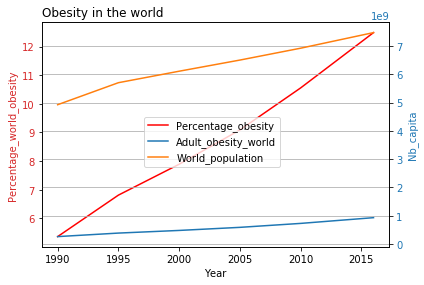

In [91]:
data = fusion.loc[:, ['Year','Country','adult_obesity_Both sexes_nb', 'Total Population - Both sexes']]\
        .groupby("Year", as_index = False).agg({'Country':'nunique',
                                                'adult_obesity_Both sexes_nb':'sum',
                                                'Total Population - Both sexes':'sum'})
data['adult_obesity_Both sexes_nb%'] = data['adult_obesity_Both sexes_nb']/data['Total Population - Both sexes']*100
data


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage_world_obesity', color=color)
ax1.plot(data["Year"].to_list(), data["adult_obesity_Both sexes_nb%"].to_list(), label = "Percentage_obesity", color = "red")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Nb_capita', color=color)  # we already handled the x-label with ax1
ax2.plot(data["Year"].to_list(), data["adult_obesity_Both sexes_nb"].to_list(), label = "Adult_obesity_world")
ax2.plot(data["Year"].to_list(), data['Total Population - Both sexes'].to_list(), label = "World_population")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc = 'center')
plt.title("Obesity in the world", loc = "left")
plt.grid()
plt.draw()

In [92]:
data

Year  Country  adult_obesity_Both sexes_nb  Total Population - Both sexes  \
0  1990      188                  264266419.0                   4.926214e+09   
1  1995      188                  388588698.0                   5.704189e+09   
2  2000      188                  482155675.0                   6.110223e+09   
3  2005      188                  591173005.0                   6.504200e+09   
4  2010      188                  730861037.0                   6.923524e+09   
5  2016      188                  933476468.0                   7.475090e+09   

   adult_obesity_Both sexes_nb%  
0                      5.364494  
1                      6.812339  
2                      7.890967  
3                      9.089096  
4                     10.556199  
5                     12.487830

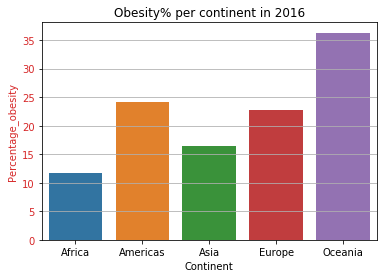

In [93]:
data = fusion[fusion["Year"]==2016].copy()

data = data.groupby("Continent", as_index = False).agg({'adult_obesity_Both sexes':'mean'})


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Continent')
ax1.set_ylabel('Percentage_obesity', color=color)
sns.barplot(data["Continent"].to_list(), data["adult_obesity_Both sexes"].to_list())
ax1.tick_params(axis='y', labelcolor=color)
plt.title("Obesity% per continent in 2016")
plt.grid(axis = "y")
plt.draw()

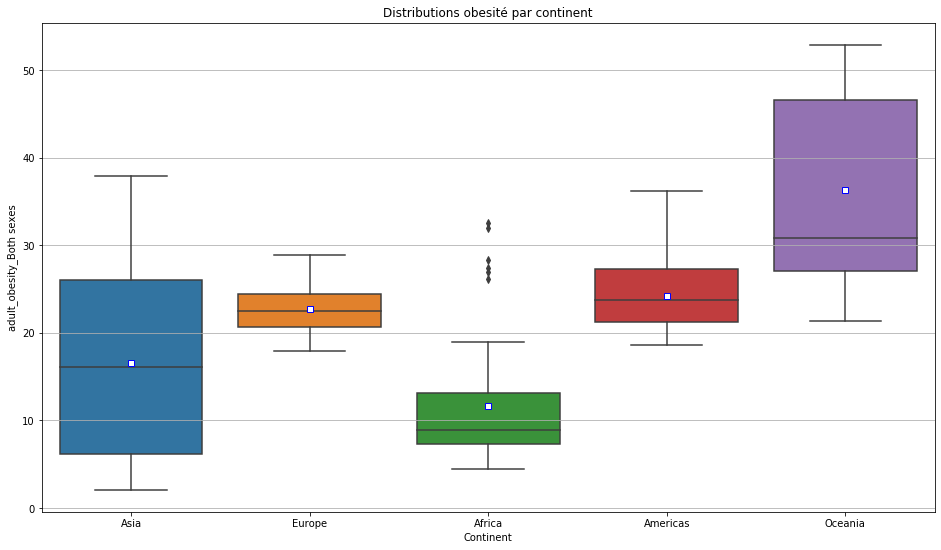

In [94]:
temp = fusion[fusion["Year"]==2016]

plt.figure(figsize=(16,9))
plt.grid()
chart = sns.boxplot(x="Continent", y='adult_obesity_Both sexes',data=temp, dodge=False, orient = 'v',
                    showfliers = True, showmeans = True,meanprops={"marker":"s","markerfacecolor":"white",
                                                                   "markeredgecolor":"blue"})
#chart.set_yscale('log')
chart.set_title("Distributions obesité par continent")
plt.draw()

In [95]:
outliers_temp = Affichage_outliers(temp[temp["Continent"]=="Africa"], ["adult_obesity_Both sexes"])

In [96]:
outliers_temp[outliers_temp["outliers_adult_obesity_Both sexes"]==True]

Country  Year Country Code  child_obesity%  \
17         Algeria  2016          DZA          28.587   
311          Egypt  2016          EGY          23.543   
575          Libya  2016          LBY          43.962   
683        Morocco  2016          MAR          31.619   
923   South Africa  2016          ZAF          31.843   
1037       Tunisia  2016          TUN          26.352   

      adult_obesity_Both sexes  adult_obesity_Male  adult_obesity_Female  \
17                        27.4                19.9                  34.9   
311                       32.0                22.7                  41.1   
575                       32.5                25.0                  39.6   
683                       26.1                19.4                  32.2   
923                       28.3                15.4                  39.6   
1037                      26.9                19.1                  34.3   

      percentage_pop_urban  Total Population - Both sexes  \
17                  71.459                     40551392.0   
311                 42.732                     94447073.0   
575                 79.540                      6492162.0   
683                 61.360                     35126283.0   
923                 65.341                     56207646.0   
1037                68.346                     11303945.0   

      Total Population - Male  Total Population - Female  pop_undernourrish  \
17                 20069497.0                 20481901.0               3.21   
311                46717301.0                 47729770.0               4.76   
575                 3209343.0                  3282817.0               0.00   
683                17715791.0                 17410483.0               3.70   
923                28471936.0                 27735713.0               5.34   
1037                5702821.0                  5601121.0               0.00   

      adult_lsport_bothsex  adult_lsport_male  adult_lsport_female  \
17               33.599998          26.900000            40.200001   
311              31.000000          23.200001            38.799999   
575              36.400002          31.200001            41.500000   
683              26.200001          20.700001            31.400000   
923              38.200001          28.500000            47.299999   
1037             30.400000          26.400000            34.099998   

      child_lsport_bothsex  child_lsport_male  child_lsport_female  \
17                    83.8               76.4                 91.3   
311                   87.5               82.1                 93.1   
575                   83.2               78.0                 88.6   
683                   87.3               84.6                 90.1   
923                    NaN                NaN                  NaN   
1037                  81.5               74.9                 88.4   

      PIB/hab in $  Fat_supply_quantity(g_capita_day)  \
17     3941.141870                              80.50   
311    2824.310351                              57.91   
575    2434.301889                                NaN   
683    2928.608681                              69.52   
923    5290.342075                              83.17   
1037   3665.802374                              97.47   

      Food_supply(kcal_capita_day)  Protein_supply_quantity(g/capita/day)  \
17                          3359.0                                  92.45   
311                         3342.0                                  96.64   
575                            NaN                                    NaN   
683                         3429.0                                  98.89   
923                         2967.0                                  83.55   
1037                        3489.0                                 101.23   

      Fat_supply_kcal_capita_day  Percentage_supply_fat_capita_day  \
17                        724.50                          0.215689   
311                       521.19  

In [97]:
outliers_temp

Country  Year Country Code  child_obesity%  \
17                     Algeria  2016          DZA          28.587   
29                      Angola  2016          AGO          27.337   
113                      Benin  2016          BEN          20.538   
137                   Botswana  2016          BWA          27.537   
161               Burkina Faso  2016          BFA          13.798   
167                    Burundi  2016          BDI           9.452   
179                   Cameroon  2016          CMR          22.353   
191                 Cabo Verde  2016          CPV          21.258   
197   Central African Republic  2016          CAF          12.814   
203                       Chad  2016          TCD           9.437   
227                    Comoros  2016          COM          28.596   
233                      Congo  2016          COG          12.973   
245              Cote d'Ivoire  2016          CVI          14.310   
275           Congo, Dem. Rep.  2016          COM          16.002   
287                   Djibouti  2016          DJI          26.763   
311                      Egypt  2016          EGY          23.543   
323          Equatorial Guinea  2016          GNQ          55.402   
329                    Eritrea  2016          ERI           7.667   
341                   Ethiopia  2016          ETH          13.438   
365                      Gabon  2016          GAB          18.845   
371                     Gambia  2016          GMB          12.878   
389                      Ghana  2016          GHA           8.943   
413                     Guinea  2016          GIN          14.334   
419              Guinea-Bissau  2016          GNB          19.009   
521                      Kenya  2016          KEN          13.460   
563                    Lesotho  2016          LSO          15.725   
569                    Liberia  2016          LBR          16.392   
575                      Libya  2016          LBY          43.962   
599                 Madagascar  2016          MDG          11.001   
605                     Malawi  2016          MWI          18.263   
623                       Mali  2016          MLI          13.783   
641                 Mauritania  2016          MRT          10.968   
647                  Mauritius  2016          MUS          30.348   
683                    Morocco  2016          MAR          31.619   
689                 Mozambique  2016          MOZ          19.212   
701                    Namibia  2016          NAM          11.525   
731                      Niger  2016          NER           7.520   
737                    Nigeria  2016          NGA          17.765   
833                     Rwanda  2016          RWA          20.563   
857      Sao Tome and Principe  2016          STP          10.421   
869                    Senegal  2016          SEN           7.682   
881                 Seychelles  2016          SYC          25.508   
887               Sierra Leone  2016          SLE          21.439   
917                    Somalia  2016          SOM          10.245   
923               South Africa  2016          ZAF          31.843   
1001                  Tanzania  2016          TZA          11.302   
1019                      Togo  2016          TGO           9.911   
1037                   Tunisia  2016          TUN          26.352   
1055                    Uganda  2016          UGA          13.914   
1121                    Zambia  2016          ZMB          35.937   
1127                  Zimbabwe  2016          ZWE          11.215   

      adult_obesity_Both sexes  adult_obesity_Male  adult_obesity_Female  \
17                        27.4                19.9                  34.9   
29                         8.2                 4.0                  12.1   
113                        9.6                 4.7                  14.2   
137                       18.9                 8.1                  29.3   
161                        5.6                 2.6    

In [98]:
a = outliers_temp[outliers_temp["outliers_adult_obesity_Both sexes"]==True].loc[:,["child_obesity%", "percentage_pop_urban",
                                                                                  "pop_undernourrish", "adult_lsport_bothsex",
                                                                                  "child_lsport_bothsex", "PIB/hab in $",
                                                                                  "Percentage_supply_fat_capita_day"]].dropna()
b = outliers_temp[outliers_temp["outliers_adult_obesity_Both sexes"]==False].loc[:,["child_obesity%", "percentage_pop_urban",
                                                                                  "pop_undernourrish", "adult_lsport_bothsex",
                                                                                  "child_lsport_bothsex", "PIB/hab in $",
                                                                                    "Percentage_supply_fat_capita_day"]].dropna()

tempor = pd.concat([a, b])

for i in a.columns:
    k2, p = normaltest(tempor[i])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"{i} ne vient pas d'une distribution normale avec pvalue = {p}")
        k2, p = levene(a[i], b[i], center = 'median')
        if p < alpha:  
            print(f"Les deux groupes ont une variance différente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = False)
            print(f"Test de student pvalue = {p}")
        else :
            print(f"Les deux groupes ont une variance équivalente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = True)
            print(f"Test de student pvalue = {p}")
    else:
        print(f"{i} vient d'une distribution normale avec pvalue = {p}")
        k2, p = levene(a[i], b[i], center = 'mean')
        if p < alpha:  
            print(f"Les deux groupes ont une variance différente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = False)
            print(f"Test de student pvalue = {p}")
        else :
            print(f"Les deux groupes ont une variance équivalente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = True)
            print(f"Test de student pvalue = {p}")

child_obesity% vient d'une distribution normale avec pvalue = 0.12658319992898928
Les deux groupes ont une variance équivalente pour child_obesity% avec une pvalue = 0.0672540708444689
Test de student pvalue = 0.04212360481659284
percentage_pop_urban vient d'une distribution normale avec pvalue = 0.6846434452789939
Les deux groupes ont une variance équivalente pour percentage_pop_urban avec une pvalue = 0.8892113151184726
Test de student pvalue = 0.01887023106148944
pop_undernourrish vient d'une distribution normale avec pvalue = 0.1356653060858199
Les deux groupes ont une variance équivalente pour pop_undernourrish avec une pvalue = 0.05345381290219824
Test de student pvalue = 0.10388419364697353
adult_lsport_bothsex vient d'une distribution normale avec pvalue = 0.7373625125571295
Les deux groupes ont une variance équivalente pour adult_lsport_bothsex avec une pvalue = 0.08035114534795565
Test de student pvalue = 0.10840739510797705
child_lsport_bothsex ne vient pas d'une distributio

D:\Users\Mathieu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [99]:
outliers_temp[outliers_temp["outliers_adult_obesity_Both sexes"]==True].loc[:,["Country","child_obesity%", "percentage_pop_urban",
                                                                                  "pop_undernourrish", "adult_lsport_bothsex",
                                                                                  "child_lsport_bothsex", "PIB/hab in $",
                                                                                  "Percentage_supply_fat_capita_day"]].dropna()

Country  child_obesity%  percentage_pop_urban  pop_undernourrish  \
17    Algeria          28.587                71.459               3.21   
311     Egypt          23.543                42.732               4.76   
683   Morocco          31.619                61.360               3.70   
1037  Tunisia          26.352                68.346               0.00   

      adult_lsport_bothsex  child_lsport_bothsex  PIB/hab in $  \
17               33.599998                  83.8   3941.141870   
311              31.000000                  87.5   2824.310351   
683              26.200001                  87.3   2928.608681   
1037             30.400000                  81.5   3665.802374   

      Percentage_supply_fat_capita_day  
17                            0.215689  
311                           0.155952  
683                           0.182467  
1037                          0.251427

In [100]:
outliers_temp[outliers_temp["outliers_adult_obesity_Both sexes"]==False].loc[:,["Country","child_obesity%", "percentage_pop_urban",
                                                                                  "pop_undernourrish", "adult_lsport_bothsex",
                                                                                  "child_lsport_bothsex", "PIB/hab in $",
                                                                                  "Percentage_supply_fat_capita_day"]].dropna()

Country  child_obesity%  percentage_pop_urban  pop_undernourrish  \
113        Benin          20.538                46.229               7.36   
137     Botswana          27.537                67.933              18.52   
389        Ghana           8.943                54.749               7.37   
521        Kenya          13.460                26.105              23.44   
641   Mauritania          10.968                51.962              12.01   
647    Mauritius          30.348                40.910               7.92   
689   Mozambique          19.212                34.926              33.06   
701      Namibia          11.525                47.961              12.72   
869      Senegal           7.682                46.296              10.00   
1001    Tanzania          11.302                32.333              24.51   
1055      Uganda          13.914                22.624               0.00   
1121      Zambia          35.937                42.438               0.00   
1127    Zimbabwe          11.215                32.296               0.00   

      adult_lsport_bothsex  child_lsport_bothsex  PIB/hab in $  \
113              15.900000                  75.9    789.075269   
137              21.700001                  87.5   6953.144156   
389              21.799999                  87.5   1950.234376   
521              15.400000                  86.8   1427.704067   
641              41.299999                  87.2   1526.646410   
647              29.799999                  82.2   9691.909714   
689               5.600000                  87.1    414.055163   
701              33.400002                  87.4   4551.399560   
869              23.100000                  88.5   1235.452194   
1001              6.500000                  82.1    918.375034   
1055              5.500000                  85.7    612.791914   
1121             22.100000                  89.3   1292.999808   
1127             26.799999                  86.6   1272.335448   

      Percentage_supply_fat_capita_day  
113                           0.177630  
137                           0.262215  
389                           0.125908  
521                           0.184755  
641                           0.203507  
647                           0.281906  
689                           0.156185  
701                           0.191009  
869                           0.253453  
1001                          0.198045  
1055                          0.186881  
1121                          0.204582  
1127                          0.236788

In [101]:
outliers_temp=outliers_temp.rename(columns = {"outliers_adult_obesity_Both sexes":"outliers_adult_obesity_Both_sexes"})

In [102]:
model = ols('percentage_pop_urban ~ C(outliers_adult_obesity_Both_sexes)', data=outliers_temp).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df         F    PR(>F)
C(outliers_adult_obesity_Both_sexes)   2427.675153   1.0  8.049937  0.006696
Residual                              14174.114538  47.0       NaN       NaN

In [103]:
outliers_temp["adult_obesity_Both sexes"]

17      27.4
29       8.2
113      9.6
137     18.9
161      5.6
167      5.4
179     11.4
191     11.8
197      7.5
203      6.1
227      7.8
233      9.6
245     10.3
275      6.7
287     13.5
311     32.0
323      8.0
329      5.0
341      4.5
365     15.0
371     10.3
389     10.9
413      7.7
419      9.5
521      7.1
563     16.6
569      9.9
575     32.5
599      5.3
605      5.8
623      8.6
641     12.7
647     10.8
683     26.1
689      7.2
701     17.2
731      5.5
737      8.9
833      5.8
857     12.4
869      8.8
881     14.0
887      8.7
917      8.3
923     28.3
1001     8.4
1019     8.4
1037    26.9
1055     5.3
1121     8.1
1127    15.5
Name: adult_obesity_Both sexes, dtype: float64

In [104]:
temp

Country  Year Country Code  child_obesity%  \
5                          Afghanistan  2016          AFG          22.074   
11                             Albania  2016          ALB          38.681   
17                             Algeria  2016          DZA          28.587   
23                             Andorra  2016          AND          26.564   
29                              Angola  2016          AGO          27.337   
35                 Antigua and Barbuda  2016          ATG          30.717   
41                           Argentina  2016          ARG          17.449   
47                             Armenia  2016          ARM          33.885   
53                           Australia  2016          AUS          25.814   
59                             Austria  2016          AUT          21.406   
65                          Azerbaijan  2016          AZE          35.908   
71                             Bahamas  2016          BHS          23.197   
77                             Bahrain  2016          BHR          17.867   
83                          Bangladesh  2016          BGD           4.690   
89                            Barbados  2016          BRB          21.915   
95                             Belarus  2016          BLR          21.884   
101                            Belgium  2016          BEL          18.953   
107                             Belize  2016          BLZ          18.848   
113                              Benin  2016          BEN          20.538   
119                             Bhutan  2016          BTN          15.546   
125                            Bolivia  2016          BOL          29.155   
131             Bosnia and Herzegovina  2016          BIH          31.575   
137                           Botswana  2016          BWA          27.537   
143                             Brazil  2016          BRA          32.631   
149                             Brunei  2016          BRN          18.883   
155                           Bulgaria  2016          BGR          33.617   
161                       Burkina Faso  2016          BFA          13.798   
167                            Burundi  2016          BDI           9.452   
173                           Cambodia  2016          KHM           4.354   
179                           Cameroon  2016          CMR          22.353   
185                             Canada  2016          CAN          29.286   
191                         Cabo Verde  2016          CPV          21.258   
197           Central African Republic  2016          CAF          12.814   
203                               Chad  2016          TCD           9.437   
209                              Chile  2016          CHL          44.657   
215                              China  2016          CHN          24.093   
221                           Colombia  2016          COL          12.473   
227                            Comoros  2016          COM          28.596   
233                              Congo  2016          COG          12.973   
239                         Costa Rica  2016          CRI          37.493   
245                      Cote d'Ivoire  2016          CVI          14.310   
251                            Croatia  2016          HRV          29.401   
257                               Cuba  2016          CUB          25.010   
263                             Cyprus  2016          CYP          29.852   
269                     Czech Republic  2016          CZE          25.584   
275                   Congo, Dem. Rep.  2016          COM          16.002   
281                            Denmark  2016          DNK          30.412   
287                           Djibouti  2016          DJI          26.763   
293                           Dominica  2016          DMA          28.585   
299                 Dominican Republic  2016          DOM          23.619   
305                            Ecuador  2016          ECU          20.894   
311                        

In [105]:
temp = temp.loc[:,['adult_obesity_Both sexes', 'adult_obesity_Male', 'adult_obesity_Female']].median()
temp

adult_obesity_Both sexes    20.5
adult_obesity_Male          17.1
adult_obesity_Female        22.2
dtype: float64

In [106]:
fusion[fusion["Year"]==2016].isna().sum()

Country                                   0
Year                                      0
Country Code                              0
child_obesity%                            0
adult_obesity_Both sexes                  7
adult_obesity_Male                        7
adult_obesity_Female                      7
percentage_pop_urban                      9
Total Population - Both sexes             3
Total Population - Male                   6
Total Population - Female                 6
pop_undernourrish                         3
adult_lsport_bothsex                     35
adult_lsport_male                        35
adult_lsport_female                      35
child_lsport_bothsex                     63
child_lsport_male                        63
child_lsport_female                      63
PIB/hab in $                              4
Fat_supply_quantity(g_capita_day)        24
Food_supply(kcal_capita_day)             24
Protein_supply_quantity(g/capita/day)    24
Fat_supply_kcal_capita_day      

In [107]:
table_traitement.columns

Index(['Year', 'Country Code', 'child_obesity%', 'adult_obesity_Both sexes',
       'adult_obesity_Male', 'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux', 'Continent',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita',
       'People per Mcdo', 'child_obesity_nb', 'adult_obesity_Both sexes_nb',
       'adult_obesity_Male_nb', 'adult_obesity_Female_nb'],
      dtype='object')

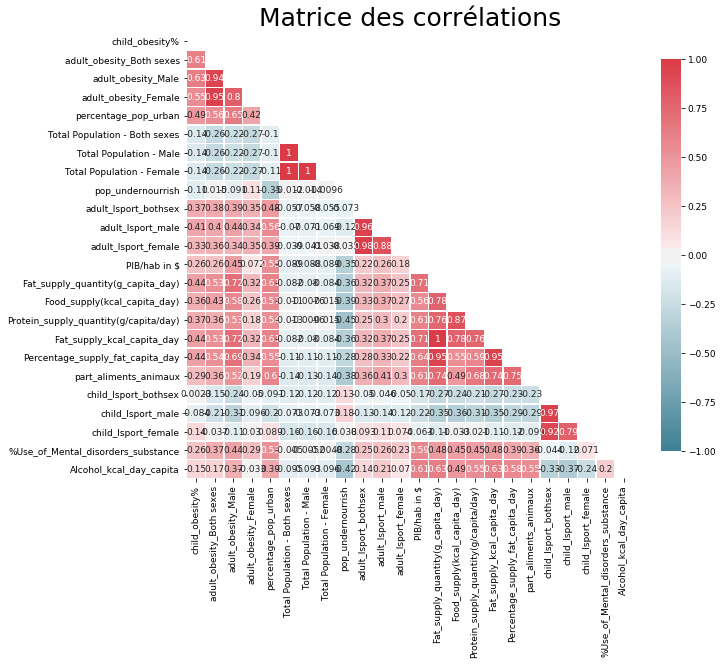

In [108]:
matrice_correlation = table_traitement.loc[:,['child_obesity%', 'adult_obesity_Both sexes',
       'adult_obesity_Male', 'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish','adult_lsport_bothsex',
       'adult_lsport_male', 'adult_lsport_female', 'PIB/hab in $',
       "Fat_supply_quantity(g_capita_day)", "Food_supply(kcal_capita_day)",
        "Protein_supply_quantity(g/capita/day)",'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
        'part_aliments_animaux','child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
        "%Use_of_Mental_disorders_substance", "Alcohol_kcal_day_capita"]]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 9}

plt.rc('font', **font)

# Compute the correlation matrix
corr = matrice_correlation.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-1,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True).set_title("Matrice des corrélations", size = 25)

plt.draw()

Suite aux corrélations présentes on peut remarquer que l'obésité de l'homme et de la femme ne sont pas complètement corrélés.
<p>Donc nous allons étudier chacun des genres séparément.
Tout d'abord les femmes en ne conservant que les corrélations de plus de 0,20, nous gardons les variables suivantes :</p>
<ul> 
    <li>Child_obesity (0,55)</li>
    <li>Percentage_pop_urban(0,42)</li>
    <li>Total Population - Female (0,27), nous ne conservons que celle regroupant les sexes que les autres par genres ont une corrélation de 1 ce qui indiquent qu'ils apportent la même information, donc on évite ici de doubler les informations</li>
    <li>Adult_lsport_female (0,35), même chose que pour les variables population</li>
    <li>Fat_supply_quantity (0,32)</li>
    <li>Food_supply (0,26)</li>
    <li>%Use_of_Mental_disorders_substance (0,29)</li>
</ul>

<p>Ensuite pour les hommes :</p>
<ul>
    <li>Child_obesity (0,63)</li>
    <li>Percentage_pop_urban (0,65)</li>
    <li>Total Population - Male (0,26)</li>
    <li>Adult_lsport_male (0,44)</li>
    <li>Fat_supply_quantity (0,72)</li>
    <li>Food_supply (0,58)</li>
    <li>Protein_supply_quantity (0,53)</li>
    <li>Part_aliments_animaux (0,52)</li>
    <li>PIB_hab_$ (0,45)</li>
    <li>chil_lsport_male (0,31)</li>
    <li>%Use_of_Mental_disorders_substance (0,44)</li>
    <li>Alcohol_kcal_day_capita (0,37)</li>

In [109]:
table_traitement.columns

Index(['Year', 'Country Code', 'child_obesity%', 'adult_obesity_Both sexes',
       'adult_obesity_Male', 'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux', 'Continent',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita',
       'People per Mcdo', 'child_obesity_nb', 'adult_obesity_Both sexes_nb',
       'adult_obesity_Male_nb', 'adult_obesity_Female_nb'],
      dtype='object')

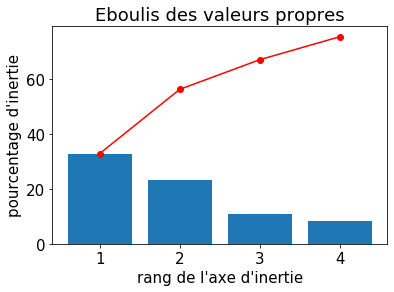

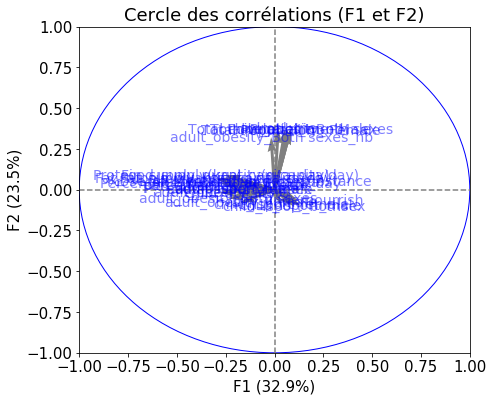

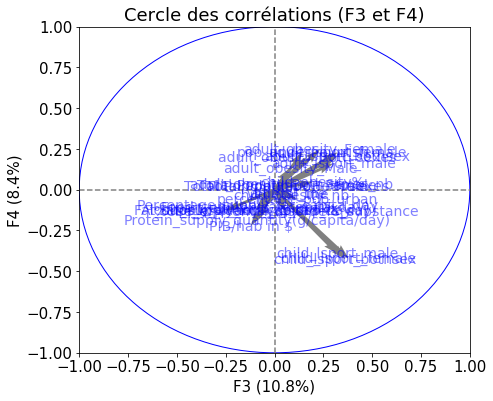

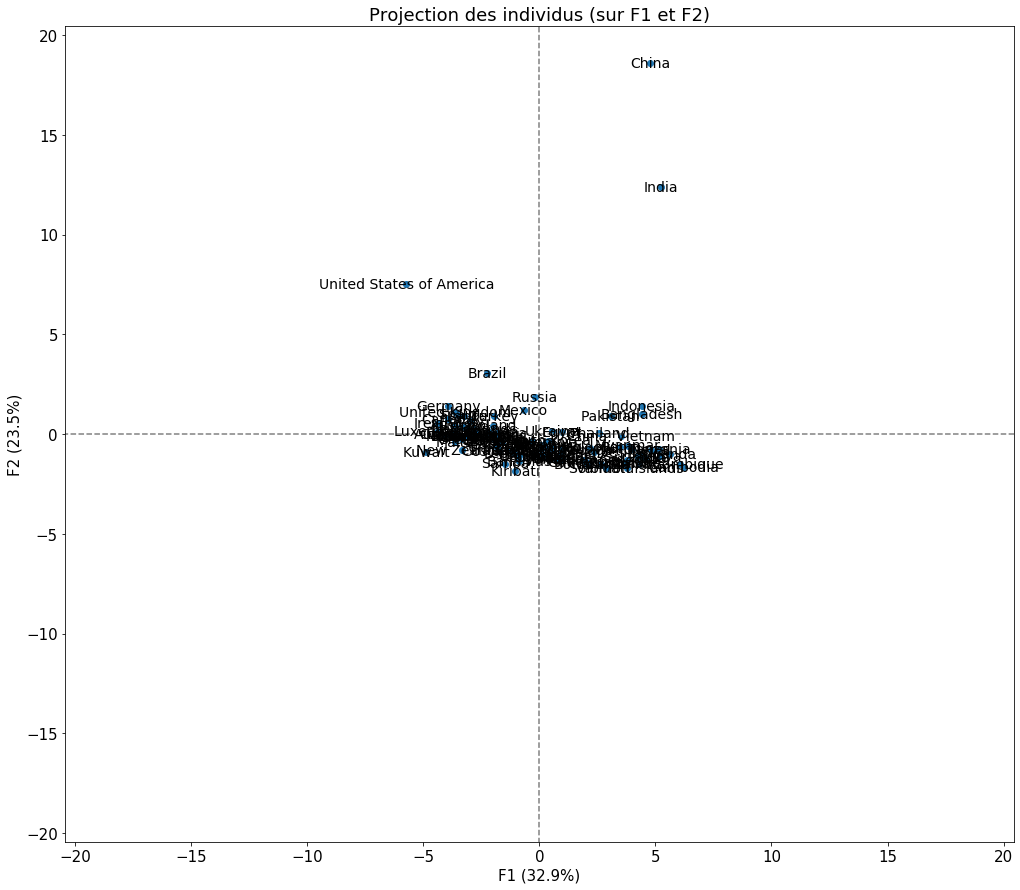

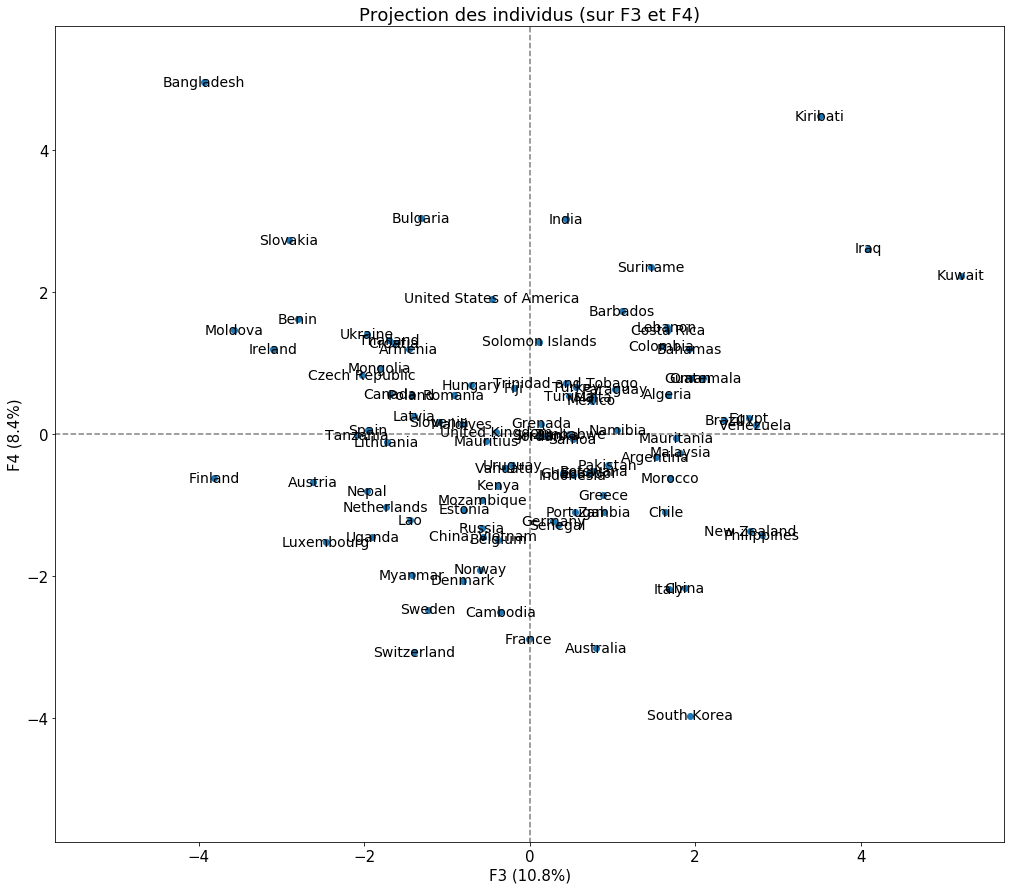

In [110]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

data = table_traitement.loc[:, ['child_obesity%', 'adult_obesity_Both sexes',
       'adult_obesity_Male', 'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita',
       'child_obesity_nb', 'adult_obesity_Both sexes_nb']]

# choix du nombre de composantes à calculer
n_comp = 4

# préparation des données pour l'ACP
data_pca = data.fillna(data.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

In [111]:
pcs.shape

(4, 28)

In [112]:
temp_ctr_cos2 = data.copy()

n = temp_ctr_cos2.shape[0]
p = temp_ctr_cos2.shape[1]
eigval = (n-1)/n*pca.explained_variance_


temp_ctr_cos2["Coord_C1"] = X_projected[:,0]
temp_ctr_cos2["Coord_C2"] = X_projected[:,1]
temp_ctr_cos2["Coord_C3"] = X_projected[:,2]
temp_ctr_cos2["Coord_C4"] = X_projected[:,3]
temp_ctr_cos2["CTR"] = np.sum(X_scaled**2, axis = 1)
temp_ctr_cos2["Cos2_1"] = round(((temp_ctr_cos2["Coord_C1"]**2)/temp_ctr_cos2["CTR"])*100,3)
temp_ctr_cos2["Cos2_2"] = round(((temp_ctr_cos2["Coord_C2"]**2)/temp_ctr_cos2["CTR"])*100,3)
temp_ctr_cos2["Cos2_3"] = round(((temp_ctr_cos2["Coord_C3"]**2)/temp_ctr_cos2["CTR"])*100,3)
temp_ctr_cos2["Cos2_4"] = round(((temp_ctr_cos2["Coord_C4"]**2)/temp_ctr_cos2["CTR"])*100,3)
temp_ctr_cos2["Cum_Cos2_1&2"] = round((temp_ctr_cos2["Cos2_1"]+temp_ctr_cos2["Cos2_2"]),3)
#temp_ctr_cos2["Cum_Cos2"] = temp_ctr_cos2["Cum_Cos2"].map(str) + "%"
#temp_ctr_cos2["Cos2_1"] = temp_ctr_cos2["Cos2_1"].map(str)+"%"
#temp_ctr_cos2["Cos2_2"] = temp_ctr_cos2["Cos2_2"].map(str)+"%"
#temp_ctr_cos2["Cos2_3"] = temp_ctr_cos2["Cos2_3"].map(str)+"%"
temp_ctr_cos2["CTR_1"] = (temp_ctr_cos2["Coord_C1"]**2)/(n*eigval[0])
temp_ctr_cos2["CTR_2"] = (temp_ctr_cos2["Coord_C2"]**2)/(n*eigval[1])
temp_ctr_cos2["CTR_3"] = (temp_ctr_cos2["Coord_C3"]**2)/(n*eigval[2])
temp_ctr_cos2["CTR_4"] = (temp_ctr_cos2["Coord_C4"]**2)/(n*eigval[3])


sqrt_eigval = np.sqrt(eigval)

corvar = np.zeros((p,p))
corr = np.zeros((p,p))
for k in range(4):
    corr[:,k] = pcs[k,:]
    corvar[:,k] = pcs[k,:] * sqrt_eigval[k]

cos2var = corvar**2
temp1 = pd.DataFrame({'id':data.columns,'CORR_1':corr[:,0],'CORR_2':corr[:,1],'CORR_3':corr[:,2], 'CORR_4':corr[:,3],
                      'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2], 'COS2_4':cos2var[:,3]})

ctrvar = cos2var

temp1["CTR_1"] = ctrvar[:,0]/eigval[0]
temp1["CTR_2"] = ctrvar[:,1]/eigval[1]
temp1["CTR_3"] = ctrvar[:,2]/eigval[2]
temp1["CTR_4"] = ctrvar[:,3]/eigval[3]

In [113]:
temp_ctr_cos2

child_obesity%  adult_obesity_Both sexes  \
Country                                                              
Algeria                           28.587                      27.4   
Argentina                         17.449                      28.3   
Armenia                           33.885                      20.2   
Australia                         25.814                      29.0   
Austria                           21.406                      20.1   
Bahamas                           23.197                      31.6   
Bangladesh                         4.690                       3.6   
Barbados                          21.915                      23.1   
Belgium                           18.953                      22.1   
Benin                             20.538                       9.6   
Botswana                          27.537                      18.9   
Brazil                            32.631                      22.1   
Bulgaria                          33.617                      25.0   
Cambodia                           4.354                       3.9   
Canada                            29.286                      29.4   
Chile                             44.657                      28.0   
China                             24.093                       6.2   
Colombia                          12.473                      22.3   
Costa Rica                        37.493                      25.7   
Croatia                           29.401                      24.4   
Czech Republic                    25.584                      26.0   
Denmark                           30.412                      19.7   
Ecuador                           20.894                      19.9   
Egypt                             23.543                      32.0   
Estonia                           26.969                      21.2   
Fiji                              31.304                      30.2   
Finland                           21.493                      22.2   
France                            21.295                      21.6   
Germany                           25.932                      22.3   
Ghana                              8.943                      10.9   
Greece                            34.851                      24.9   
Grenada                           26.189                      21.3   
Guatemala                         21.064                      21.2   
Hungary                           27.369                      26.4   
India                             11.778                       3.9   
Indonesia                         17.097                       6.9   
Iraq                              28.794                      30.4   
Ireland                           29.727                      25.3   
Italy                             34.807                      19.9   
Jordan                            15.106                      35.5   
Kenya                             13.460                       7.1   
Kiribati                          38.792                      46.0   
Kuwait                            53.682                      37.9   
Lao                                7.770                       5.3   
Latvia                            21.883                      23.6   
Lebanon                           25.331                      32.0   
Lithuania                         20.488                      26.3   
Luxembourg                        29.960                      22.6   
Malaysia                          35.414                      15.6   
Maldives                          14.802                       8.6   
Malta                             39.366                      28.9   
Mauritania                        10.968                      12.7   
Mauritius                         30.348                      10.8   
Mexico                            23.974                      28.9   
Moldova                           10.441                      18.9   
Mongolia                          24

In [114]:
temp1

id    CORR_1    CORR_2    CORR_3  \
0                          child_obesity% -0.192440 -0.020521  0.196669   
1                adult_obesity_Both sexes -0.236761 -0.054099  0.165522   
2                      adult_obesity_Male -0.279599 -0.018570  0.079477   
3                    adult_obesity_Female -0.176154 -0.079912  0.232226   
4                    percentage_pop_urban -0.254142  0.028047  0.115097   
5           Total Population - Both sexes  0.081530  0.367501  0.064347   
6                 Total Population - Male  0.081111  0.368542  0.064227   
7               Total Population - Female  0.081908  0.366448  0.064447   
8                       pop_undernourrish  0.120876 -0.066341  0.144094   
9                    adult_lsport_bothsex -0.179268  0.003362  0.321061   
10                      adult_lsport_male -0.195526  0.005869  0.300818   
11                    adult_lsport_female -0.157403  0.002098  0.323396   
12                   child_lsport_bothsex  0.098054 -0.100633  0.362735   
13                      child_lsport_male  0.131204 -0.096363  0.323800   
14                    child_lsport_female  0.032985 -0.090117  0.379057   
15                           PIB/hab in $ -0.230547  0.044353 -0.121930   
16      Fat_supply_quantity(g_capita_day) -0.296631  0.066959 -0.095114   
17           Food_supply(kcal_capita_day) -0.252542  0.089537 -0.047543   
18  Protein_supply_quantity(g/capita/day) -0.250169  0.089171 -0.088870   
19             Fat_supply_kcal_capita_day -0.296631  0.066959 -0.095114   
20       Percentage_supply_fat_capita_day -0.274780  0.040396 -0.085354   
21                             animal_tne  0.019894  0.377120  0.066675   
22                            vegetal_tne  0.066685  0.368315  0.069974   
23                  part_aliments_animaux -0.252035  0.024877 -0.090098   
24     %Use_of_Mental_disorders_substance -0.183958  0.048807  0.058432   
25                Alcohol_kcal_day_capita -0.197533  0.044114 -0.250358   
26                       child_obesity_nb  0.054699  0.369898  0.088094   
27            adult_obesity_Both sexes_nb -0.017228  0.322187  0.085253   

      CORR_4    COS2_1    COS2_2    COS2_3    COS2_4     CTR_1     CTR_2  \
0   0.048072  0.341187  0.002769  0.117454  0.005430  0.037033  0.000421   
1   0.201408  0.516444  0.019240  0.083197  0.095314  0.056056  0.002927   
2   0.133116  0.720235  0.002267  0.019181  0.041635  0.078176  0.000345   
3   0.246274  0.285883  0.041983  0.163764  0.142507  0.031030  0.006386   
4  -0.058206  0.595053  0.005171  0.040228  0.007960  0.064588  0.000787   
5   0.022163  0.061241  0.887894  0.012573  0.001154  0.006647  0.135057   
6   0.020499  0.060612  0.892930  0.012527  0.000987  0.006579  0.135823   
7   0.023725  0.061810  0.882810  0.012613  0.001323  0.006709  0.134284   
8   0.229375  0.134612  0.028934  0.063051  0.123621  0.014611  0.004401   
9   0.204427  0.296078  0.000074  0.313021  0.098192  0.032137  0.000011   
10  0.160993  0.352217  0.000226  0.274792  0.060899  0.038230  0.000034   
11  0.228988  0.228259  0.000029  0.317591  0.123204  0.024776  0.000004   
12 -0.425334  0.088580  0.066577  0.399556  0.425071  0.009615  0.010127   
13 -0.392847  0.158599  0.061047  0.318385  0.362618  0.017215  0.009286   
14 -0.420573  0.010024  0.053389  0.436321  0.415608  0.001088  0.008121   
15 -0.222489  0.489691  0.012933  0.045146  0.116310  0.053152  0.001967   
16 -0.124723  0.810655  0.029476  0.027472  0.036550  0.087990  0.004484   
17 -0.108491  0.587586  0.052704  0.006864  0.027656  0.063778  0.008017   
18 -0.188932  0.576593  0.052275  0.023983  0.083871  0.062584  0.007951   
19 -0.124723  0.810655  0.029476  0.027472  0.036550  0.087990  0.004484   
20 -0.097092  0.695619  0.010728  0.022123  0.022150  0.075504  0.001632   
21 -0.021325  0.003646  0.934980  0.013500  0.001068  0.000396  0.142219   
22 -0.028310  0.040969  0.891830  0.014869  0.001883  0.004447  0.135656   
23 -0.114503  0.585225  0.004069  0.024

In [115]:
temp

adult_obesity_Both sexes    20.5
adult_obesity_Male          17.1
adult_obesity_Female        22.2
dtype: float64

In [116]:
outliers = Affichage_outliers(data, data.columns)
outliers

child_obesity%  adult_obesity_Both sexes  \
Country                                                              
Algeria                           28.587                      27.4   
Argentina                         17.449                      28.3   
Armenia                           33.885                      20.2   
Australia                         25.814                      29.0   
Austria                           21.406                      20.1   
Bahamas                           23.197                      31.6   
Bangladesh                         4.690                       3.6   
Barbados                          21.915                      23.1   
Belgium                           18.953                      22.1   
Benin                             20.538                       9.6   
Botswana                          27.537                      18.9   
Brazil                            32.631                      22.1   
Bulgaria                          33.617                      25.0   
Cambodia                           4.354                       3.9   
Canada                            29.286                      29.4   
Chile                             44.657                      28.0   
China                             24.093                       6.2   
Colombia                          12.473                      22.3   
Costa Rica                        37.493                      25.7   
Croatia                           29.401                      24.4   
Czech Republic                    25.584                      26.0   
Denmark                           30.412                      19.7   
Ecuador                           20.894                      19.9   
Egypt                             23.543                      32.0   
Estonia                           26.969                      21.2   
Fiji                              31.304                      30.2   
Finland                           21.493                      22.2   
France                            21.295                      21.6   
Germany                           25.932                      22.3   
Ghana                              8.943                      10.9   
Greece                            34.851                      24.9   
Grenada                           26.189                      21.3   
Guatemala                         21.064                      21.2   
Hungary                           27.369                      26.4   
India                             11.778                       3.9   
Indonesia                         17.097                       6.9   
Iraq                              28.794                      30.4   
Ireland                           29.727                      25.3   
Italy                             34.807                      19.9   
Jordan                            15.106                      35.5   
Kenya                             13.460                       7.1   
Kiribati                          38.792                      46.0   
Kuwait                            53.682                      37.9   
Lao                                7.770                       5.3   
Latvia                            21.883                      23.6   
Lebanon                           25.331                      32.0   
Lithuania                         20.488                      26.3   
Luxembourg                        29.960                      22.6   
Malaysia                          35.414                      15.6   
Maldives                          14.802                       8.6   
Malta                             39.366                      28.9   
Mauritania                        10.968                      12.7   
Mauritius                         30.348                      10.8   
Mexico                            23.974                      28.9   
Moldova                           10.441                      18.9   
Mongolia                          24

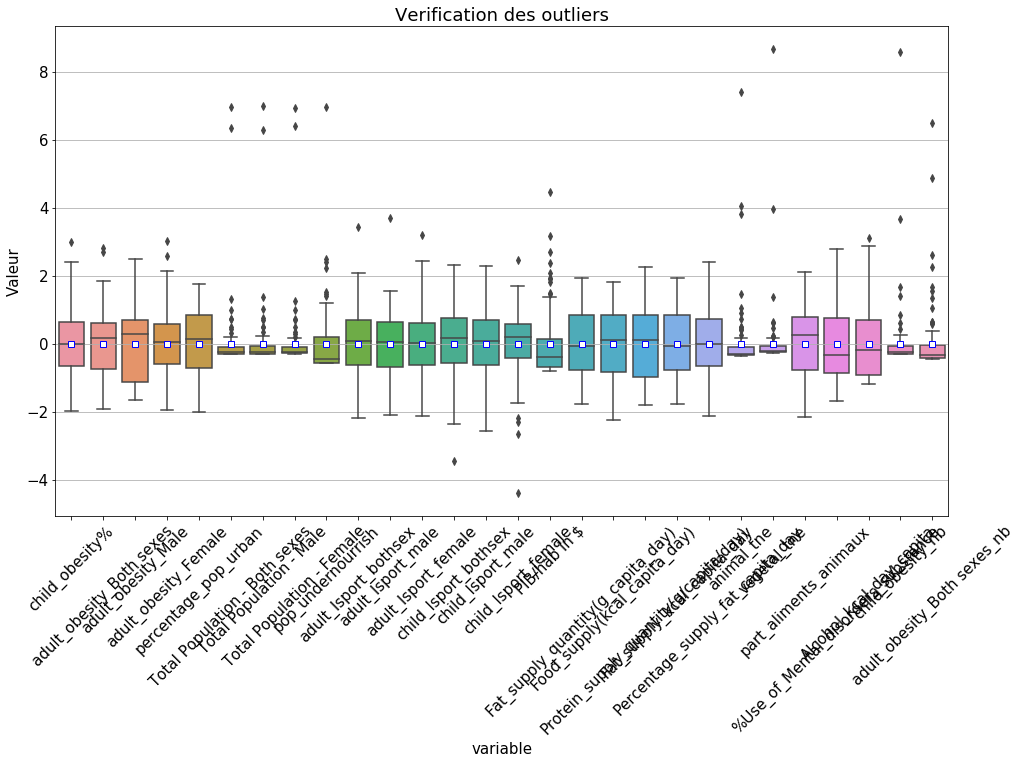

In [117]:
temp = centre_reduit(data)
temp = temp.reset_index().melt(value_vars=data.columns)

plt.figure(figsize=(16,9))
plt.grid()
chart = sns.boxplot(x="variable", y="value",data=temp, dodge=False, orient = 'v', showfliers = True, showmeans = True,\
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_ylabel("Valeur")
chart.set_title("Verification des outliers")
plt.draw()

In [118]:
#toto = data["PIB/hab in $"]
data["PIB/hab in $"] = data["PIB/hab in $"].apply(lambda x: np.log(x))

for i in data.columns:
    k2, p = normaltest(data[i])
    alpha = 0.05
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"The null hypothesis can be rejected for {i}")
    else:
        print(f"The null hypothesis cannot be rejected for {i}")

p = 0.601549
The null hypothesis cannot be rejected for child_obesity%
p = 0.968838
The null hypothesis cannot be rejected for adult_obesity_Both sexes
p = 0.0624254
The null hypothesis cannot be rejected for adult_obesity_Male
p = 0.537236
The null hypothesis cannot be rejected for adult_obesity_Female
p = 0.00107317
The null hypothesis can be rejected for percentage_pop_urban
p = 1.16215e-34
The null hypothesis can be rejected for Total Population - Both sexes
p = 1.69849e-34
The null hypothesis can be rejected for Total Population - Male
p = 8.215e-35
The null hypothesis can be rejected for Total Population - Female
p = 5.37497e-26
The null hypothesis can be rejected for pop_undernourrish
p = 0.503582
The null hypothesis cannot be rejected for adult_lsport_bothsex
p = 0.197368
The null hypothesis cannot be rejected for adult_lsport_male
p = 0.625181
The null hypothesis cannot be rejected for adult_lsport_female
p = 0.00510117
The null hypothesis can be rejected for child_lsport_both

In [119]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_continent = encoder.fit_transform(table_traitement["Continent"].to_numpy().reshape(-1, 1))
# Encodage des features


new_features_names = list(dict.fromkeys(table_traitement["Continent"].to_list()))
train_encoded = pd.DataFrame(enc_continent, columns=new_features_names)
train_encoded.index = table_traitement.index
train_encoded
table_traitement = pd.concat([table_traitement, train_encoded], axis=1)

In [120]:
table_traitement.columns

Index(['Year', 'Country Code', 'child_obesity%', 'adult_obesity_Both sexes',
       'adult_obesity_Male', 'adult_obesity_Female', 'percentage_pop_urban',
       'Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'pop_undernourrish',
       'adult_lsport_bothsex', 'adult_lsport_male', 'adult_lsport_female',
       'child_lsport_bothsex', 'child_lsport_male', 'child_lsport_female',
       'PIB/hab in $', 'Fat_supply_quantity(g_capita_day)',
       'Food_supply(kcal_capita_day)', 'Protein_supply_quantity(g/capita/day)',
       'Fat_supply_kcal_capita_day', 'Percentage_supply_fat_capita_day',
       'animal_tne', 'vegetal_tne', 'part_aliments_animaux', 'Continent',
       '%Use_of_Mental_disorders_substance', 'Alcohol_kcal_day_capita',
       'People per Mcdo', 'child_obesity_nb', 'adult_obesity_Both sexes_nb',
       'adult_obesity_Male_nb', 'adult_obesity_Female_nb', 'Africa',
       'Americas', 'Asia', 'Oceania', 'Europe'],
      dtype='objec

### Recherche colinéarité des variables

In [121]:
data = table_traitement.loc[:,['child_obesity%', 'percentage_pop_urban',
       'Total Population - Both sexes', 'pop_undernourrish',
       'PIB/hab in $','Percentage_supply_fat_capita_day', 'Alcohol_kcal_day_capita']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif.round(1)

VIF Factor                          features
0        10.1                    child_obesity%
1        15.0              percentage_pop_urban
2         1.1     Total Population - Both sexes
3         1.5                 pop_undernourrish
4         3.1                      PIB/hab in $
5        20.2  Percentage_supply_fat_capita_day
6         4.7           Alcohol_kcal_day_capita

In [122]:
table_traitement.shape

(98, 39)

### Exploration des modèles de régression pour l'obésité dans le monde

In [123]:
#créer y et X
y=table_traitement.loc[:,"adult_obesity_Female"]
X=table_traitement.drop(["Year","Country Code", "Continent", "adult_obesity_Both sexes", "adult_obesity_Male","adult_obesity_Female",
                         "Food_supply(kcal_capita_day)",'child_obesity_nb', 'Total Population - Both sexes', 'Total Population - Female',
                         'adult_obesity_Both sexes_nb', 'adult_obesity_Male_nb','adult_obesity_Female_nb', 'adult_lsport_female', 'child_lsport_female',
                        'adult_lsport_bothsex', 'child_lsport_bothsex', 'animal_tne', 'vegetal_tne', 'Protein_supply_quantity(g/capita/day)',
                        'Fat_supply_kcal_capita_day', 'Fat_supply_quantity(g_capita_day)', 'part_aliments_animaux', 'People per Mcdo'],axis=1)
# préparation des données 
data_lreg = X.fillna(X.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_lreg.values

# Centrage
X_scaled = preprocessing.scale(X)
X = pd.DataFrame(X_scaled, columns = data_lreg.columns)
X = X.set_index(y.index)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     adult_obesity_Female   R-squared:                       0.631
Model:                              OLS   Adj. R-squared:                  0.569
Method:                   Least Squares   F-statistic:                     10.13
Date:                  Fri, 13 Nov 2020   Prob (F-statistic):           8.59e-13
Time:                          15:18:26   Log-Likelihood:                -320.73
No. Observations:                    98   AIC:                             671.5
Df Residuals:                        83   BIC:                             710.2
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [124]:
#créer y et X
y=table_traitement.loc[:,"adult_obesity_Male"]
X=table_traitement.drop(["Year","Country Code", "Continent", "adult_obesity_Both sexes", "adult_obesity_Male","adult_obesity_Female",
                         "Food_supply(kcal_capita_day)",'child_obesity_nb', 'Total Population - Both sexes', 'Total Population - Female',
                         'adult_obesity_Both sexes_nb', 'adult_obesity_Male_nb','adult_obesity_Female_nb', 'adult_lsport_female', 'child_lsport_female',
                        'adult_lsport_bothsex', 'child_lsport_bothsex', 'animal_tne', 'vegetal_tne', 'Protein_supply_quantity(g/capita/day)',
                        'Fat_supply_kcal_capita_day', 'Fat_supply_quantity(g_capita_day)', 'part_aliments_animaux', 'People per Mcdo'],axis=1)
# préparation des données 
data_lreg = X.fillna(X.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_lreg.values

# Centrage
X_scaled = preprocessing.scale(X)
X = pd.DataFrame(X_scaled, columns = data_lreg.columns)
X = X.set_index(y.index)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     adult_obesity_Male   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     27.13
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           3.84e-25
Time:                        15:18:26   Log-Likelihood:                -276.71
No. Observations:                  98   AIC:                             583.4
Df Residuals:                      83   BIC:                             622.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
model = sm.OLS(y_train, X_train)
results = model.fit()
print("R² du model d'entraînement : ", results.rsquared)
prediction = results.predict(X_test)
rcarre = metrics.r2_score(y_test ,prediction)
print("R² du model de test : ", rcarre)

R² du model d'entraînement :  0.8232543842576523
R² du model de test :  0.7523582003388379


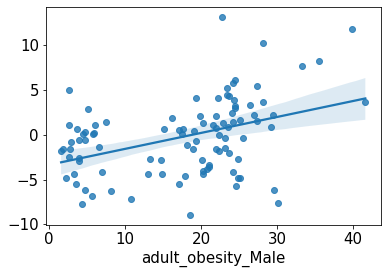

In [126]:
sns.regplot(x=y, y=y-results.predict(X), ci = 95)

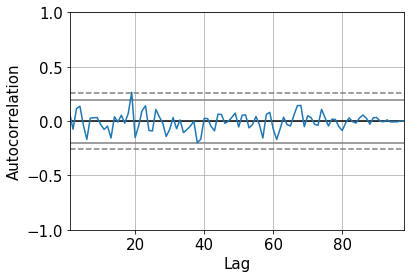

In [127]:
autocorrelation_plot(y-results.predict(X))
plt.show()

In [128]:
normaltest(y-results.predict(X))

NormaltestResult(statistic=6.358607849283075, pvalue=0.0416146119478661)

### Random Forest :

In [129]:
features = X.drop("const", axis = 1)
features_name = features.columns
features = features.to_numpy()
features.shape

(98, 15)

In [130]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 20)
# Train the model on training data
resulto = rf.fit(features, y)

In [131]:
# Use the forest's predict method on the test data
predictions = resulto.predict(features)
# Calculate the absolute errors
errors = abs(predictions - y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')

Mean Absolute Error: 1.62 %


In [132]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.31 %.


In [133]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state = 42)
model = rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
predictions = model.predict(X_train)
# Calculate the absolute errors
errors = abs(predictions - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print("R² du model d'entraînement : ", round(accuracy, 2), '%.')
prediction = model.predict(X_test)
rcarre = round(metrics.r2_score(y_test ,prediction)*100,2)
print("R² du model de test : ", rcarre, '%')

R² du model d'entraînement :  78.45 %.
R² du model de test :  67.52 %


In [134]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [135]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 231, 452, 673, 894,
                                                         1115, 1336, 1557, 1778,
                                                         2000]},
                   random_state=42, verbose=2)

In [136]:
rf_random.best_params_

{'n_estimators': 231,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [137]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 3.4706 %
Accuracy = 75.53%.


In [138]:
# Get numerical feature importances
importances = list(best_random.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(features_name, round(importance, 2)) for features_name, importance in zip(features_name, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Percentage_supply_fat_capita_day Importance: 0.18
Variable: percentage_pop_urban Importance: 0.15
Variable: child_obesity%       Importance: 0.12
Variable: PIB/hab in $         Importance: 0.09
Variable: Total Population - Male Importance: 0.08
Variable: %Use_of_Mental_disorders_substance Importance: 0.07
Variable: pop_undernourrish    Importance: 0.06
Variable: child_lsport_male    Importance: 0.05
Variable: Asia                 Importance: 0.05
Variable: Alcohol_kcal_day_capita Importance: 0.04
Variable: adult_lsport_male    Importance: 0.03
Variable: Europe               Importance: 0.03
Variable: Africa               Importance: 0.02
Variable: Americas             Importance: 0.01
Variable: Oceania              Importance: 0.01


In [139]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=30)
# Extract the two most important features
train_important = table_traitement.loc[:, ['percentage_pop_urban', 'Percentage_supply_fat_capita_day']].to_numpy()
# Train the random forest
rf_most_important.fit(train_important, y)
# Make predictions and determine the error
predictions = rf_most_important.predict(train_important)
errors = abs(predictions - y)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.73 %
Accuracy: 81.91 %.


### XGBOOST :

In [140]:
param = {
    'eta': 0.2, 
    'max_depth': 3,  
    'objective': 'reg:squarederror'} 

steps = 30  # The number of training iterations
df = X.drop("const", axis=1)
df = df.rename(columns = lambda x: x.replace(' ', '_'))
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state = 42)
D_train = xgb.DMatrix(data=X_train, label=y_train)
D_test = xgb.DMatrix(data=X_test, label=y_test)
model = xgb.train(param, D_train, steps)

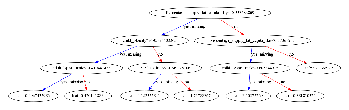

In [141]:
xgb.plot_tree(model, num_trees=2)
plt.rcParams['figure.figsize'] = [100, 16]
plt.show()

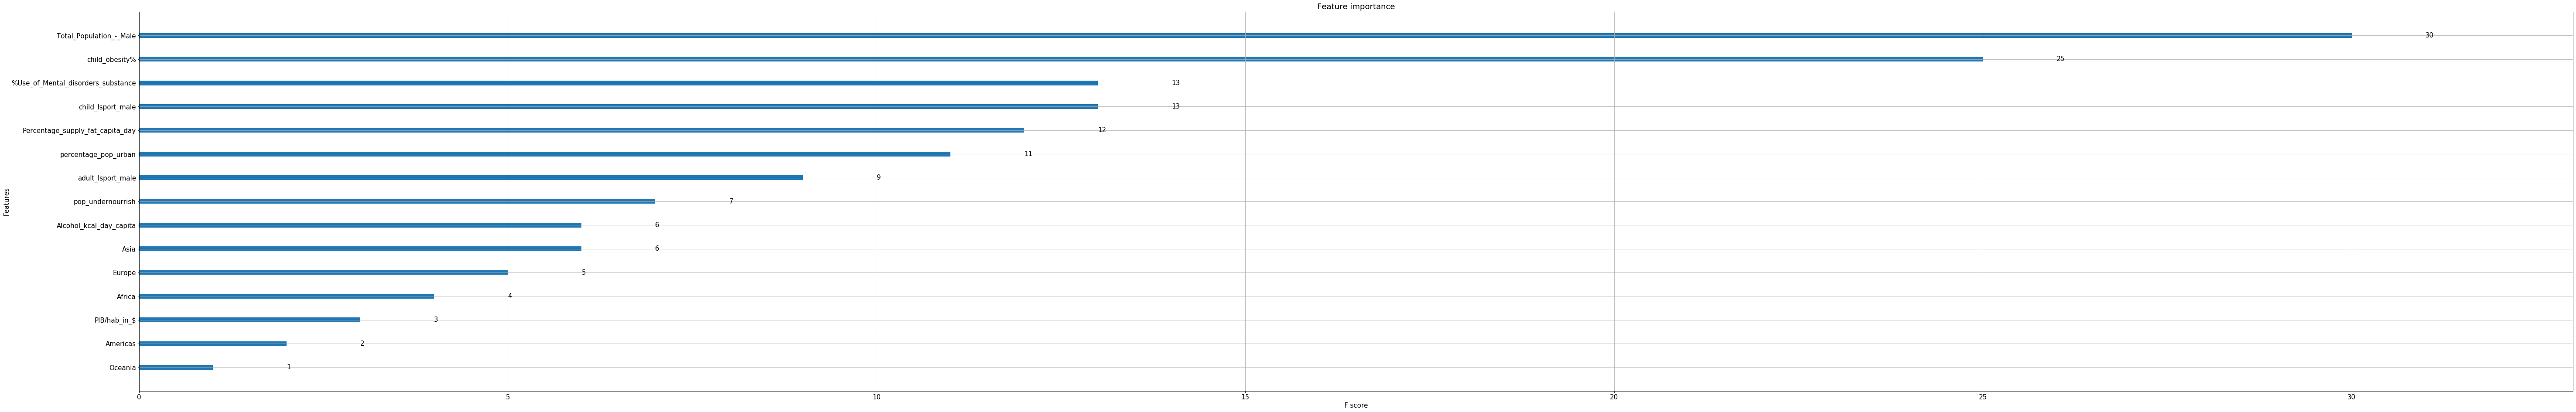

In [142]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [7, 5]
plt.show()

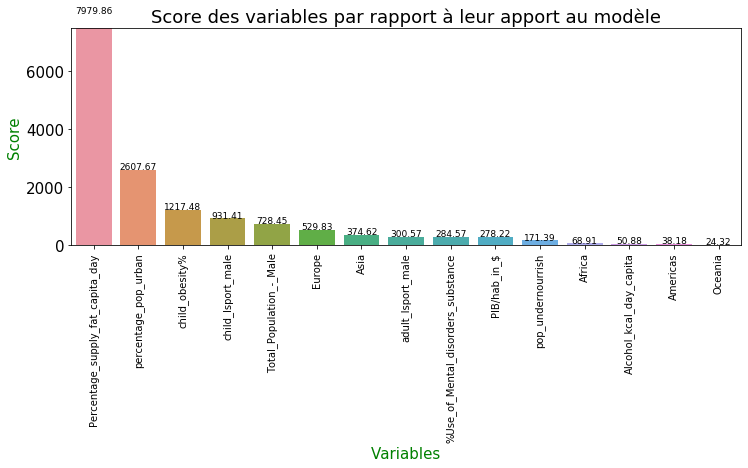

In [143]:
#Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
f = 'total_gain'
gain_score = model.get_score(importance_type= f)
    
gain_score = pd.Series(gain_score).sort_values(ascending = False)
gain_score = gain_score.round(2)



fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x = gain_score.index, y = gain_score, ax = ax)
plt.xticks(rotation=90, size = 10)
plt.title("Score des variables par rapport à leur apport au modèle")
plt.ylabel("Score", color = 'g')
plt.xlabel("Variables", color = 'g', position = (0.5,-1.0))
ax.set_ylim(0,7500)
for i in range(0, gain_score.shape[0]) :
    ax.text(x = i, y = gain_score[i]+20, s = gain_score[i], ha='center', size = 9)
plt.show()

In [144]:
gain_score.index

Index(['Percentage_supply_fat_capita_day', 'percentage_pop_urban',
       'child_obesity%', 'child_lsport_male', 'Total_Population_-_Male',
       'Europe', 'Asia', 'adult_lsport_male',
       '%Use_of_Mental_disorders_substance', 'PIB/hab_in_$',
       'pop_undernourrish', 'Africa', 'Alcohol_kcal_day_capita', 'Americas',
       'Oceania'],
      dtype='object')

In [145]:
evaluate(model, D_train, y_train)

Model Performance
Average Error: 0.8472 %
Accuracy = 91.08%.


91.0779588215823

In [146]:
evaluate(model, D_test, y_test)

Model Performance
Average Error: 3.3897 %
Accuracy = 76.34%.


76.34382545138344

### Méthode du coude

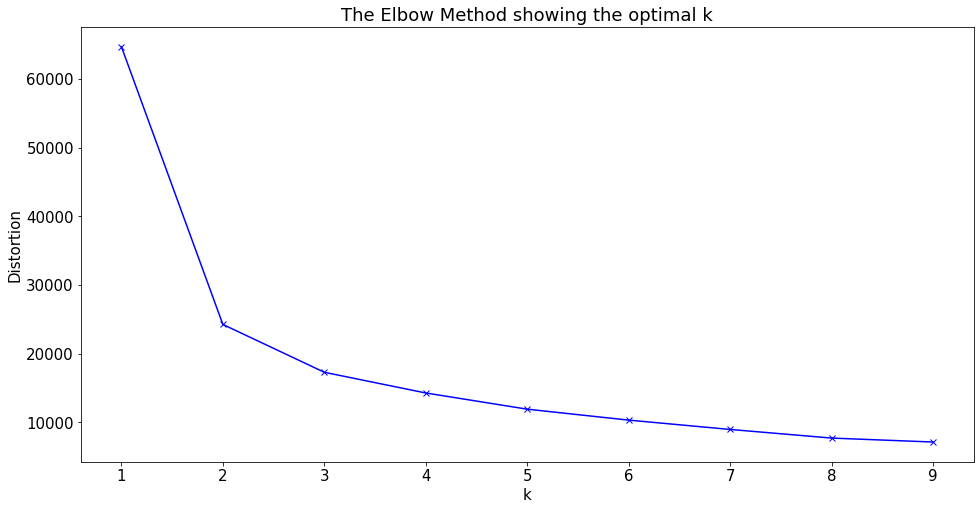

In [147]:
data = table_traitement.loc[:, ['adult_obesity_Male', 'child_obesity%', 'percentage_pop_urban', 'Percentage_supply_fat_capita_day']]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Indice silhouette

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5315020114819231
For n_clusters = 3 The average silhouette_score is : 0.3869828339956205
For n_clusters = 4 The average silhouette_score is : 0.3397640364820518
For n_clusters = 5 The average silhouette_score is : 0.35646376101927707
For n_clusters = 6 The average silhouette_score is : 0.3227421877155415


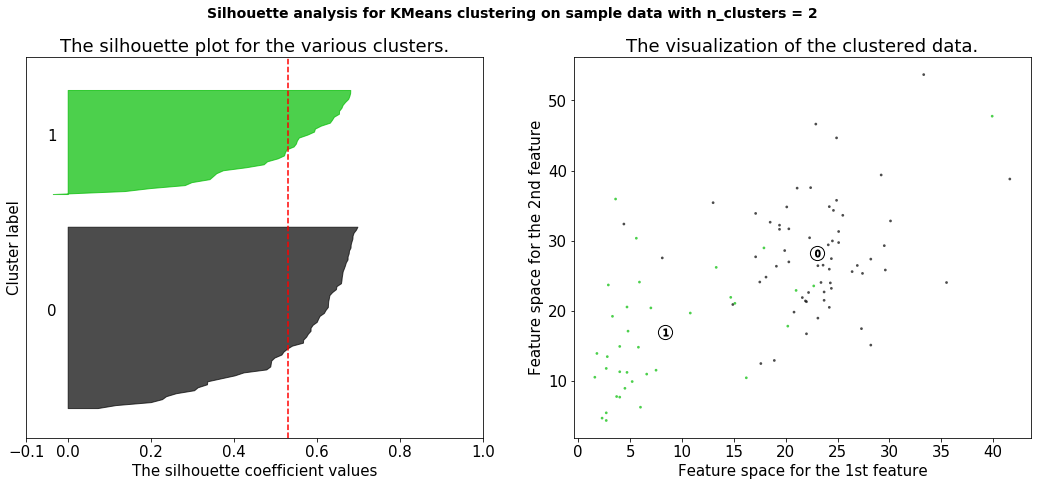

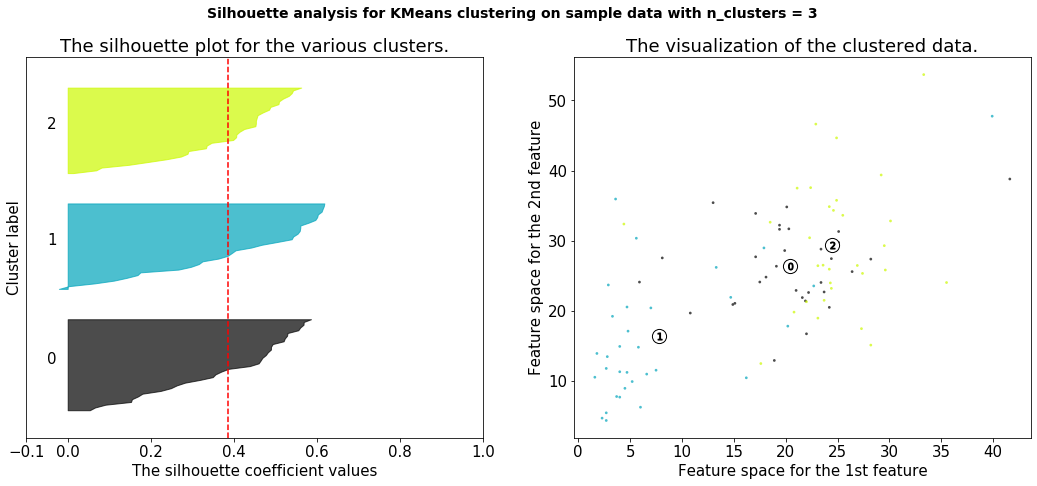

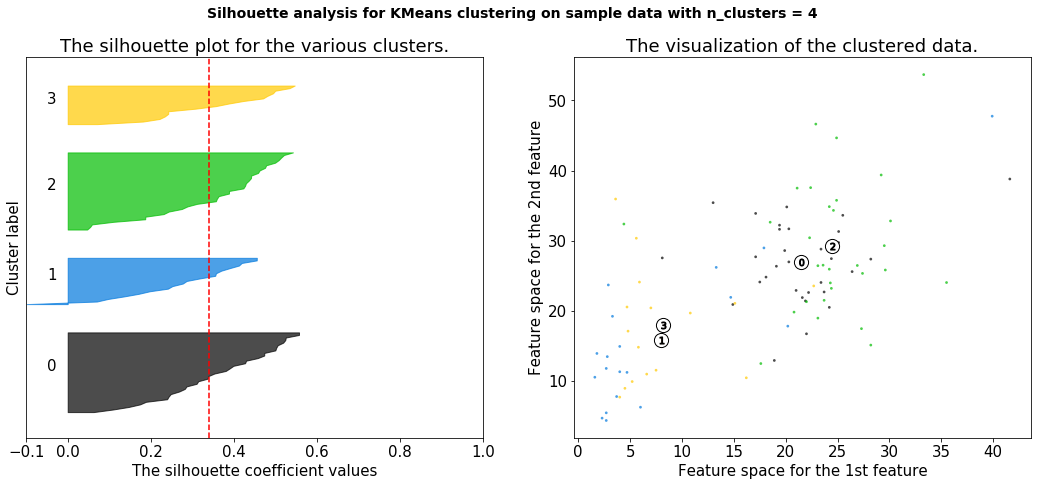

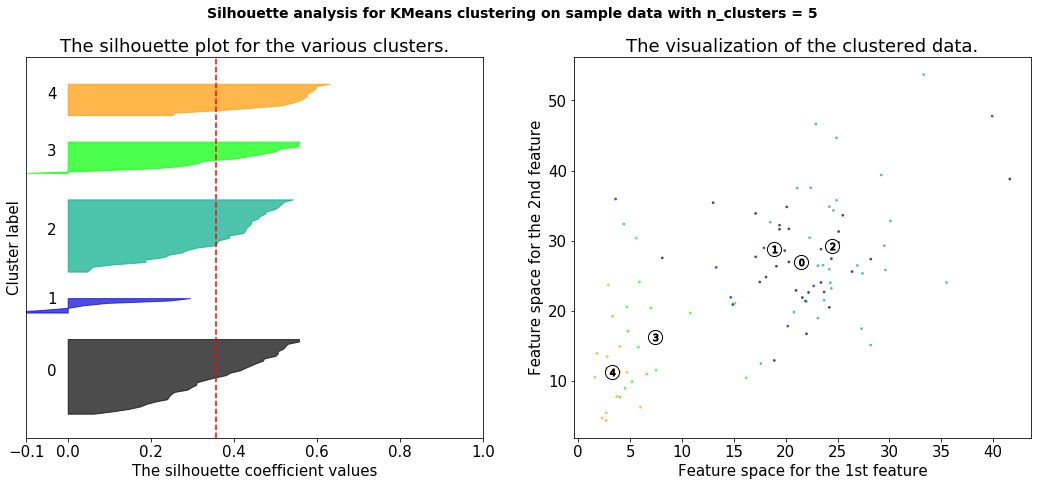

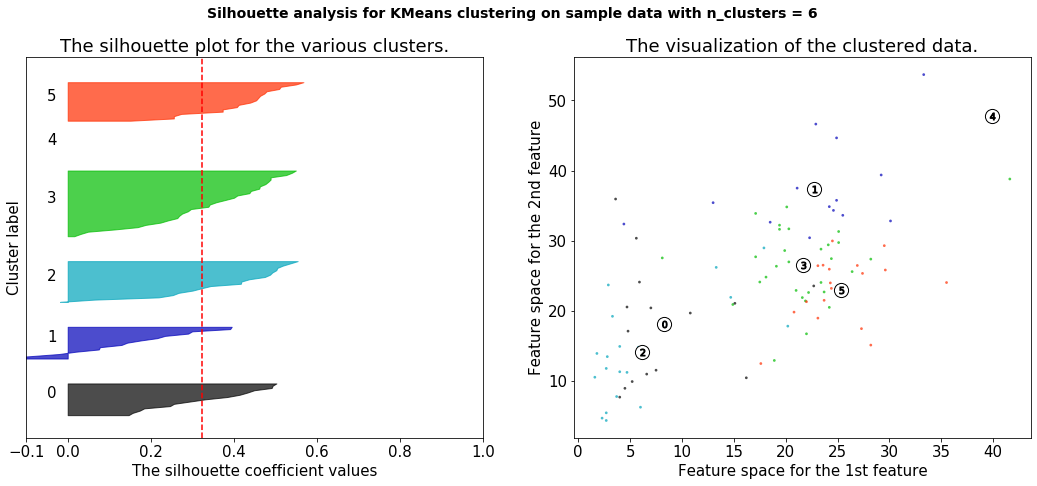

In [148]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

# préparation des données pour le clustering
X = data.values
names = data.index

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Kmeans

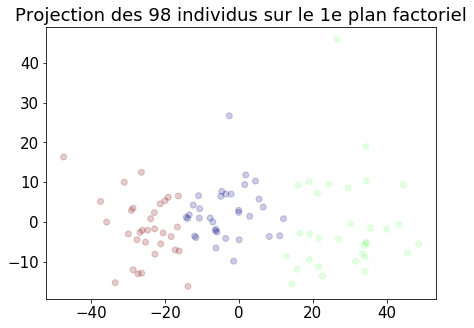

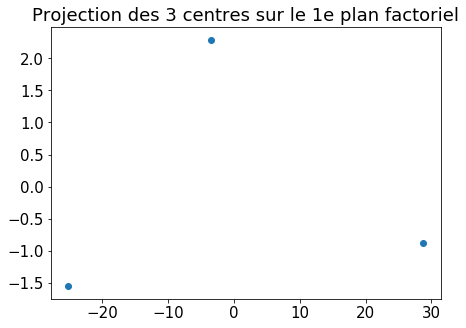

In [149]:
# Nombre de clusters souhaités
n_clust = 3

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
X_scaled = preprocessing.StandardScaler().fit_transform(X)


# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

# Affichage des positions des centres de classes
plt.figure()
centroids5 = km.cluster_centers_
centroids_projected = pca.transform(centroids5)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids5)))
plt.show()

In [150]:
clusters
table_traitement["Kmeans"] = clusters 

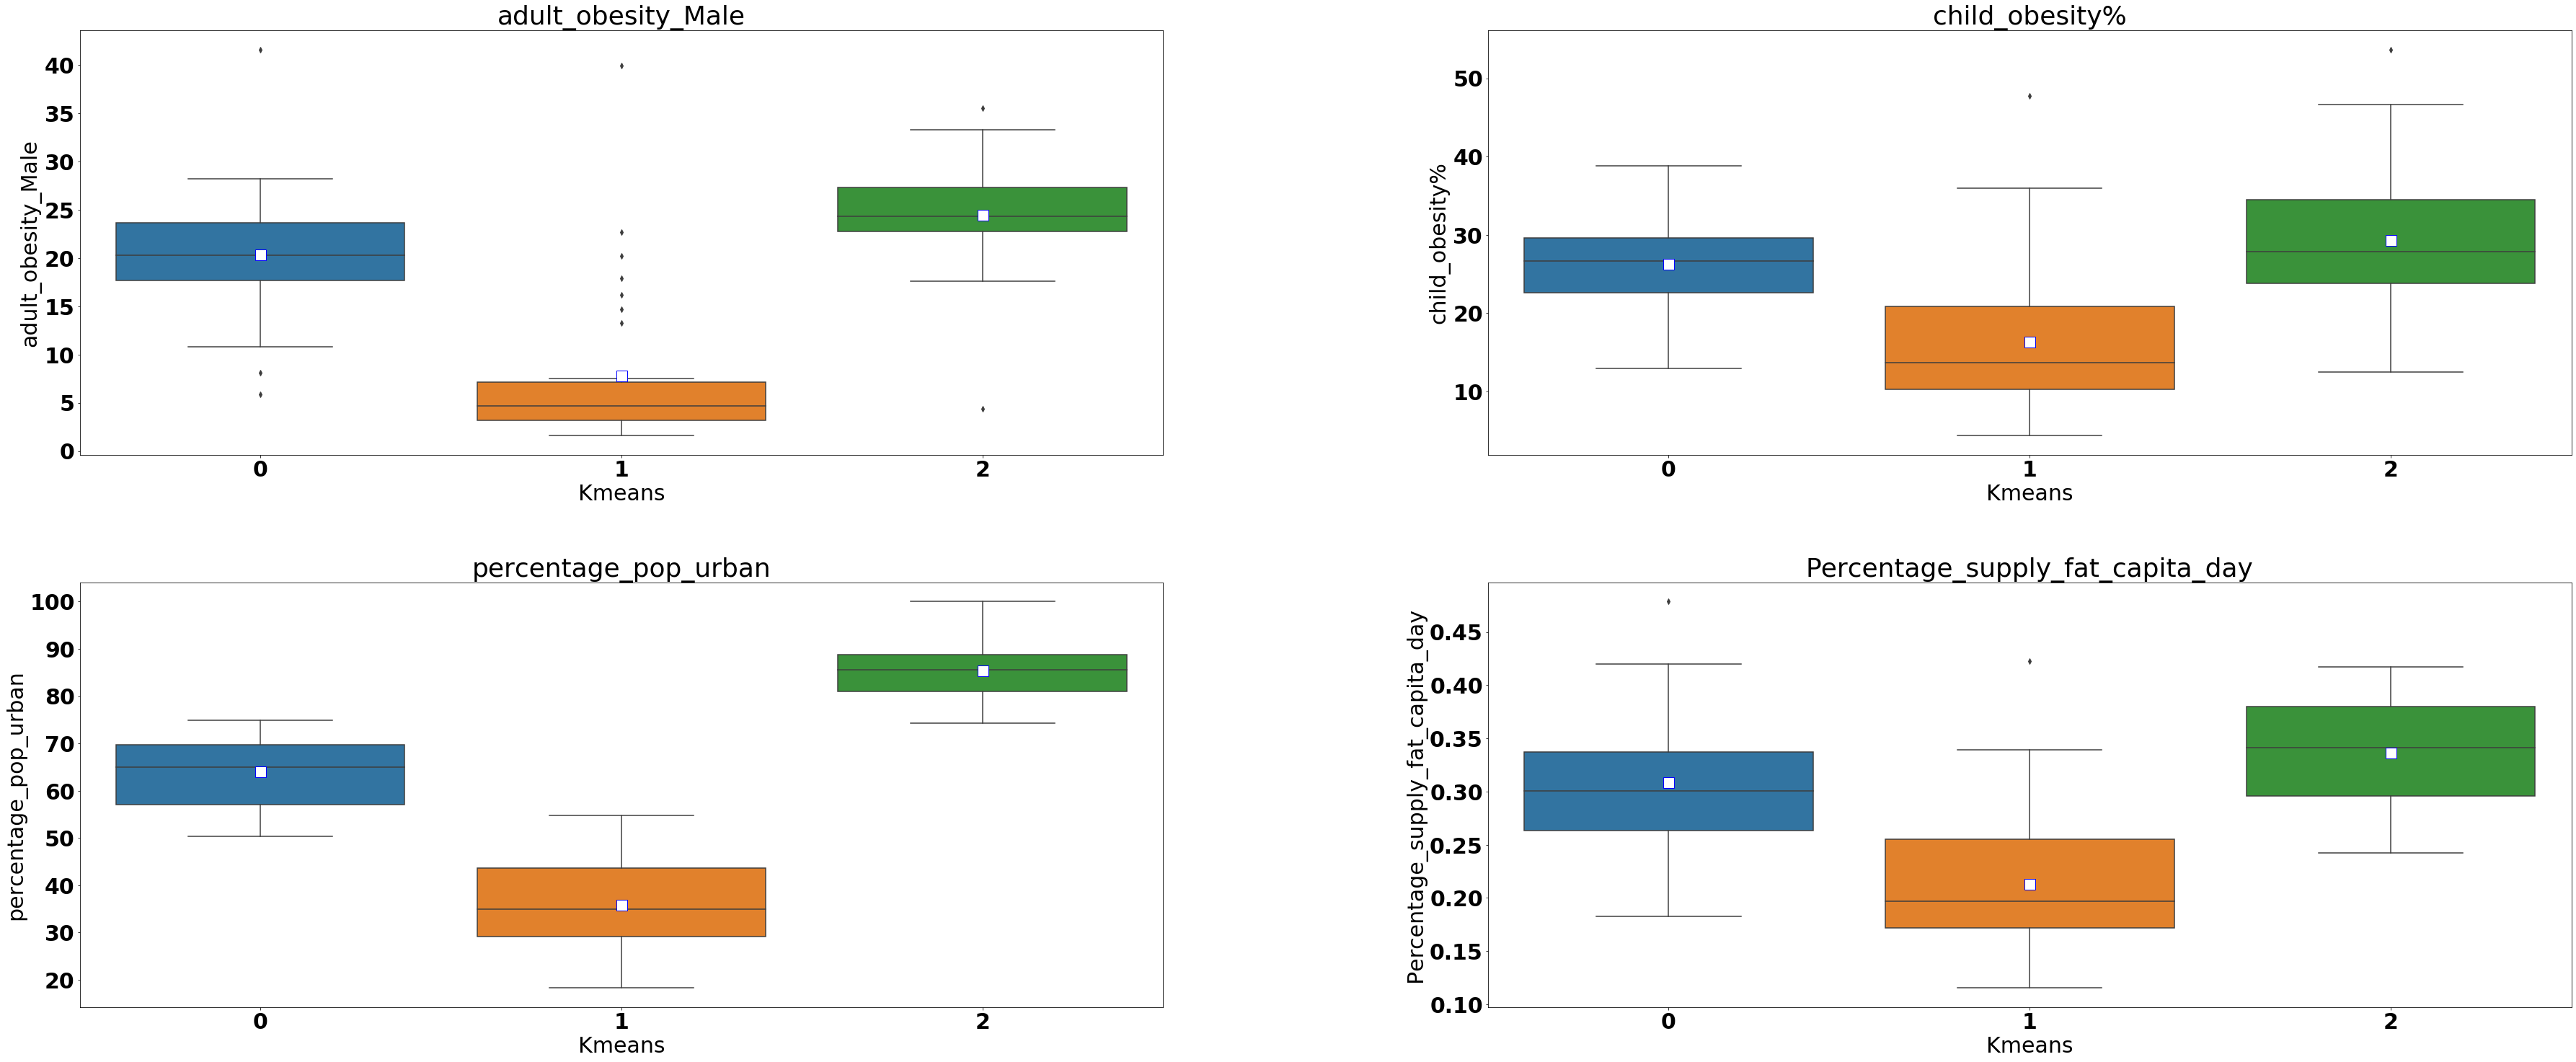

In [151]:
data = table_traitement.loc[:, ['adult_obesity_Male', 'child_obesity%', 'percentage_pop_urban', 'Percentage_supply_fat_capita_day']]

fig = plt.figure(figsize=(16, 12))
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)  
for feat_idx in range(data.shape[1]):
    ax = fig.add_subplot(7,2, (feat_idx+1))
    sns.boxplot(x="Kmeans", y=data.columns[feat_idx],data=table_traitement, dodge=False, orient = 'v', showfliers = True, showmeans = True,\
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue", "markersize":15})
    ax.set_title(data.columns[feat_idx])
        
plt.subplots_adjust(right =8, left =5,bottom=1, top=7, wspace = 0.3,hspace = 0.3)

plt.draw()

In [152]:
x = table_traitement.copy()

fig = px.choropleth(x, color="Kmeans",
                    locations=x.index, locationmode = 'country names',
                    projection="mercator"
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

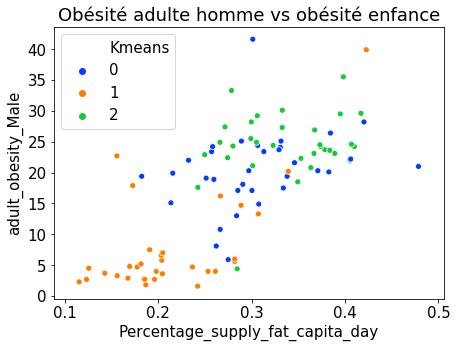

In [153]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

fig, ax = plt.subplots()
sns.scatterplot(data = table_traitement, x = "Percentage_supply_fat_capita_day",y = "adult_obesity_Male",hue='Kmeans',palette = 'bright',ax=ax)
plt.title("Obésité adulte homme vs obésité enfance")

plt.show()



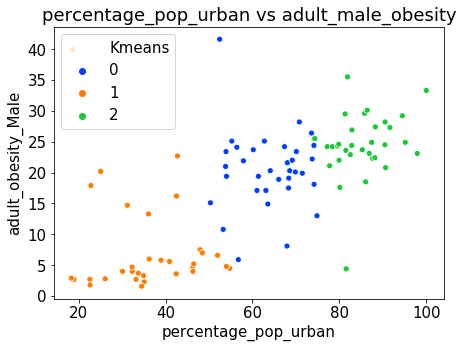

In [154]:
fig, ax = plt.subplots()
sns.scatterplot(data = table_traitement, y = "adult_obesity_Male",x = "percentage_pop_urban",hue='Kmeans',palette = 'bright', ax=ax)
plt.title("percentage_pop_urban vs adult_male_obesity")

plt.draw()

Text(0.5, 1.0, 'child_obesity% vs adult_male_obesity')

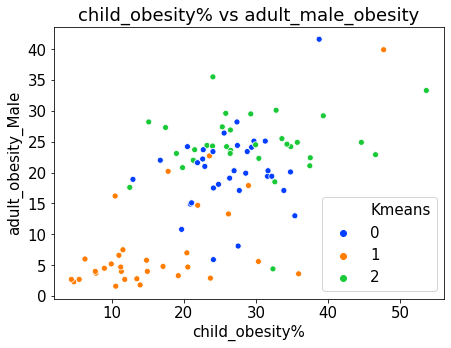

In [155]:
fig, ax = plt.subplots()
sns.scatterplot(data = table_traitement, y = "adult_obesity_Male",x = "child_obesity%",hue='Kmeans',palette = 'bright',ax=ax)
plt.title("child_obesity% vs adult_male_obesity")

In [156]:
table_traitement.to_csv("tabel_traitement.csv")

PermissionError: [Errno 13] Permission denied: 'tabel_traitement.csv'

In [ ]:
#Plotting on the WorldMap using plotly
x = table_traitement.copy()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=list(x['adult_obesity_Male']))
layout = dict(geo = {'scope':'world'},title="Taux d'obésité masculine dans le monde")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

#Plotting on the WorldMap using plotly
x = table_traitement
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            reversescale=True,
            text= x.index,
            z=list(np.log(x['People per Mcdo'])))
layout = dict(geo = {'scope':'world'},title="Nombre d'habitant par restaurant Mac Donald")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()